In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
!pip install scikit-learn
!pip install imblearn
!pip install xgboost

#import pyplot as plt
#!pip install seaborn
#!pip install scipy
#import pandas_profiling as pp
#!pip install ipywidgets
#!pip install pandas_profiling

# Load and inspect the data

In [696]:
dataOriginal = pd.read_csv("heart_disease_uci.csv")

In [697]:
dataOriginal.shape

(920, 16)

In [698]:
dataOriginal

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [699]:
samples_counts = dataOriginal["dataset"].value_counts()

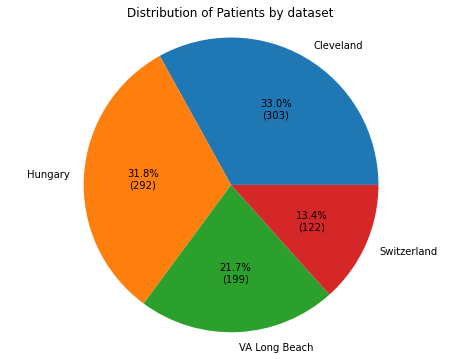

In [700]:
plt.figure(figsize=(8, 6))  # Set the size of the pie chart
plt.pie(samples_counts, labels=samples_counts.index, autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100 * samples_counts.sum())})")
plt.axis("equal")  # Ensure that the pie is drawn as a circle
plt.title("Distribution of Patients by Dataset")  # Add a title
plt.savefig("Patient_Distribution.png", bbox_inches='tight')
plt.show()  # Display the chart


In [701]:
samples_counts

Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: dataset, dtype: int64

In [702]:
dataOriginal

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [703]:
#data.dtypes

# Missing

In [704]:
#data.sex.value_counts() No one missing
#data.cp.value_counts() No one missing

#data.trestbps.value_counts()[0] One value missing!!!!!!
#data.chol.value_counts() 172 values missing!!!!!!!!!!!!

#data.restecg.value_counts() #No one missing
#data.thalch.value_counts() #No one missing
#data.exang.value_counts() #No one missing
#data.oldpeak.value_counts() #Fine
dataOriginal.slope.value_counts() #No one missing
#dataOriginal.ca.value_counts() #Seems fine?
#dataOriginal.thal.value_counts() #Seems fine?
#data.num.value_counts() #What does this mean? - 0 is below 50% narrowing, rest is above

flat           345
upsloping      203
downsloping     63
Name: slope, dtype: int64

# NaN Missing

In [705]:
dataOriginal. isna(). sum(). sum()

1759

In [709]:
dataOriginal.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [710]:
dataOriginal

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [707]:
# Handle all the 0 values and also handle all the NaN values.
# Should I just discard feature ca and thal, they are missing over 50% of the values??
# How do I handle missing values in categorical variables, that is not a numerical mean I can just replace it with?

In [715]:
#dataOriginal.isna().sum()
#dataOriginal.chol.value_counts()
dataOriginal["chol"] = dataOriginal["chol"].replace(0, np.nan)
dataOriginal.chol.value_counts() 

220.0    10
254.0    10
219.0     9
216.0     9
204.0     9
         ..
412.0     1
358.0     1
360.0     1
321.0     1
385.0     1
Name: chol, Length: 216, dtype: int64

In [716]:
dataOriginal.trestbps.value_counts()[0]
dataOriginal["trestbps"] = dataOriginal["trestbps"].replace(0, np.nan)
#data.trestbps.value_counts()[0]

In [717]:
dataOriginal.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     60
chol        202
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [718]:
missing_counts_features = dataOriginal.groupby("dataset").apply(lambda x: x.isnull().sum())

In [719]:
missing_counts_features

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
dataset,,,,,,,,,,,,,,,,
Cleveland,0,0,0,0,0,0,0,0,0,0,0,0,1,5,3,0
Hungary,0,0,0,0,0,1,23,8,1,1,1,0,189,290,265,0
Switzerland,0,0,0,0,0,2,123,75,1,1,1,6,17,118,52,0
VA Long Beach,0,0,0,0,0,57,56,7,0,53,53,56,102,198,166,0


In [720]:
total_missing_counts = missing_counts_features.sum(axis=0)

In [721]:
total_missing_counts

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     60
chol        202
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [723]:
total_samples = len(dataOriginal)  # Total number of samples in the dataset
missing_percentage = (total_missing_counts / total_samples) * 100


In [725]:
missing_percentage

id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     6.521739
chol        21.956522
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64

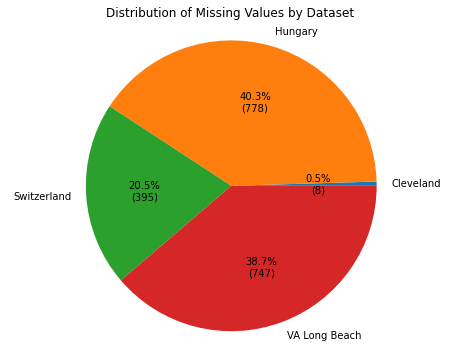

In [803]:
#plt.figure(figsize=(8, 6))
#plt.pie(missing_percentages, labels=missing_percentages.index, autopct=lambda pct: f"{pct:.1f}%\n({int(pct / 100 * missing_counts.sum())})")
#plt.axis("equal")
#plt.title("Distribution of Missing Values by Dataset")
#plt.savefig("Missing_Values_Distribution.png", bbox_inches="tight")
#plt.show()


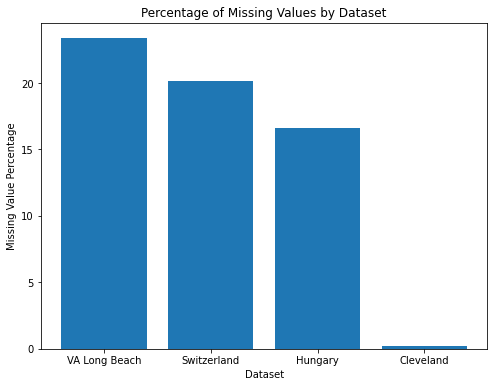

In [808]:
# Calculate the percentage of missing values for each dataset
missing_percentages = dataOriginal.groupby("dataset").apply(lambda x: (x.isnull().sum().sum() / (x.shape[0] * x.shape[1])) * 100)

# Sort the missing percentages in descending order
missing_percentages = missing_percentages.sort_values(ascending=False)

# Create a bar chart to visualize the distribution of missing values
plt.figure(figsize=(8, 6))
plt.bar(missing_percentages.index, missing_percentages)
plt.title("Percentage of Missing Values by Dataset")
plt.xlabel("Dataset")
plt.ylabel("Missing Value Percentage")
plt.savefig("Missing_Values_Distribution_barplot.png", bbox_inches="tight")
plt.show()


In [ ]:
#Drop:
# ID, dataset
# These two are not needed and can be dropped
#dataOriginal = dataOriginal.drop(["id","dataset"], axis= 1)

# Dropping thal,ca and slope columns --> data is the new name of the dataset

In [733]:
#Dropping the three features with the most missing values.
data = dataOriginal.drop(["id","dataset","thal","ca","slope"], axis= 1)


In [734]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0
...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,1
916,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,0
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,2
918,58,Male,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,0


In [679]:
data.shape

(920, 11)

In [680]:
#data.dtypes

Format some of the data. Right now the target is from 0-4, I will change that into binary so that 0 is no presence of disease and 1 is presence
Some of the names have spaces between them, I will also remove those and change some of the feature names into more appropriate names

In [735]:
data['cp'].replace({'typical angina':'typical_angina', 'atypical angina': 'atypical_angina' }, inplace =True)
data['restecg'].replace({'lv hypertrophy':'lv_hypertrophy', 'st-t abnormality': 'st-t_abnormality' }, inplace =True)

In [736]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate_achieved',
      'exercise_induced_angina', 'st_depression','target']

In [737]:
#data

In [738]:
data['target'] = ((data["target"] > 0)*1).copy()

In [741]:
data

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,target
0,63,Male,typical_angina,145.0,233.0,True,lv_hypertrophy,150.0,False,2.3,0
1,67,Male,asymptomatic,160.0,286.0,False,lv_hypertrophy,108.0,True,1.5,1
2,67,Male,asymptomatic,120.0,229.0,False,lv_hypertrophy,129.0,True,2.6,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,41,Female,atypical_angina,130.0,204.0,False,lv_hypertrophy,172.0,False,1.4,0
...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,True,st-t_abnormality,154.0,False,0.0,1
916,62,Male,typical_angina,NaN,139.0,False,st-t_abnormality,NaN,NaN,NaN,0
917,55,Male,asymptomatic,122.0,223.0,True,st-t_abnormality,100.0,False,0.0,1
918,58,Male,asymptomatic,NaN,385.0,True,lv_hypertrophy,NaN,NaN,NaN,0


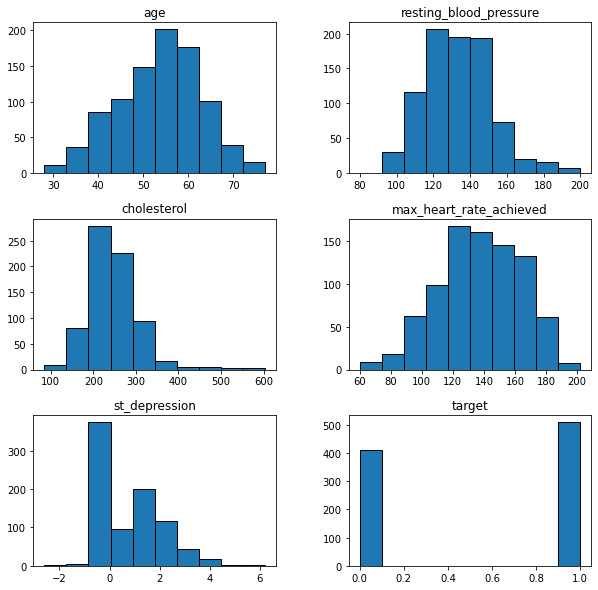

In [745]:
#Show the distribution of the data
data.hist(figsize=(10, 10), edgecolor = "k", grid = False)
plt.savefig("histograms.png", bbox_inches="tight")
plt.show()

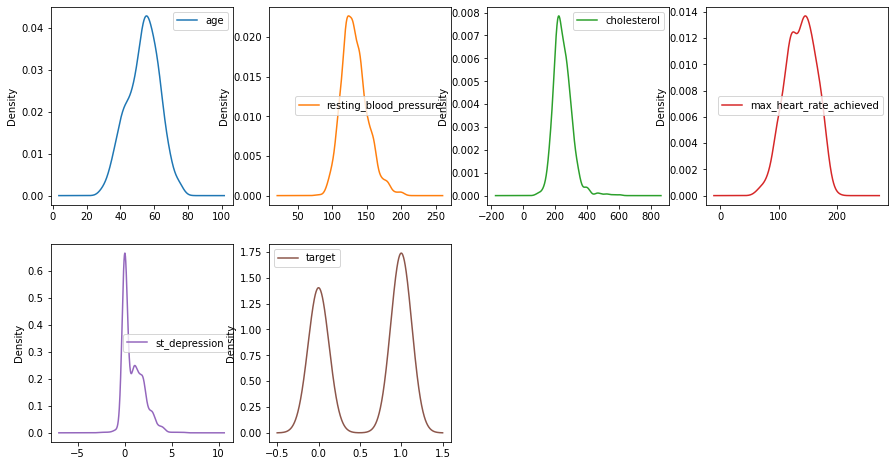

In [746]:
data.plot(kind='density', subplots=True, layout=(2,4), sharex=False, sharey=False, figsize=(15,8))
plt.savefig("DensityPlot.png", bbox_inches="tight")
plt.show()

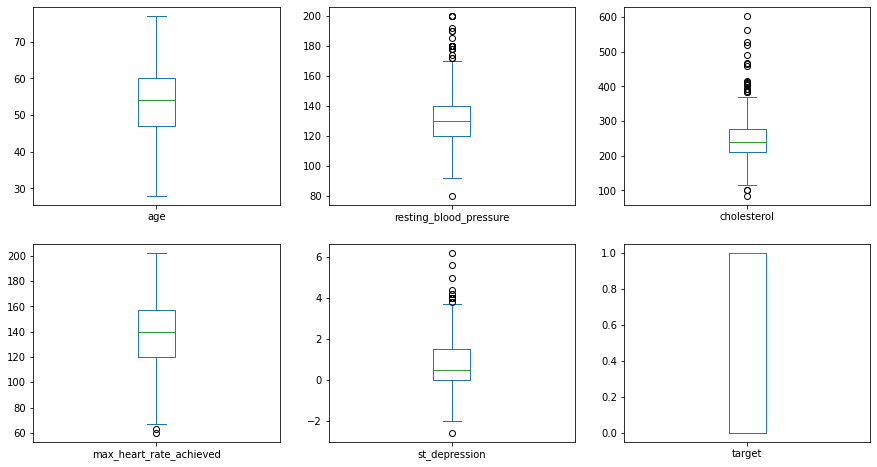

In [747]:
#Boxplot of the data
data.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False, figsize=(15,8))
plt.savefig("BoxPlot.png", bbox_inches="tight")
plt.show()

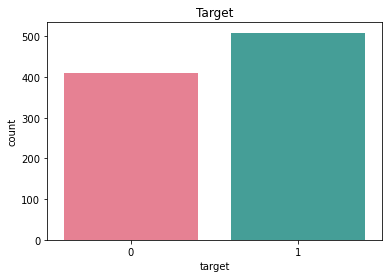

In [787]:
sns.countplot(x = "target", data = data, palette="husl")
plt.title("Target")
plt.savefig("TargetPlot.png", bbox_inches="tight")
plt.show()


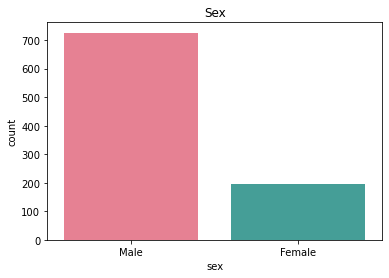

In [788]:
sns.countplot(x = "sex", data = data, palette="husl")
plt.title("Sex")
plt.savefig("GenderPlot.png", bbox_inches="tight")
plt.show()

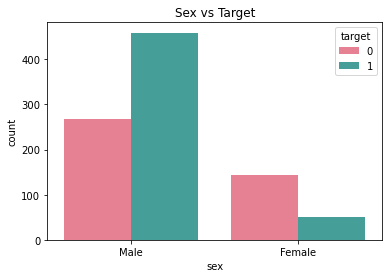

In [789]:
sns.countplot(x = "sex", data = data, palette="husl", hue = "target")
plt.title("Sex vs Target")
plt.savefig("TargetVsGender.png", bbox_inches="tight")
plt.show()

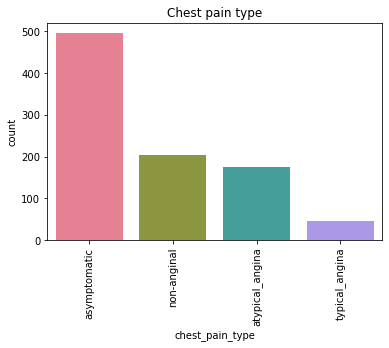

In [790]:
sns.countplot(x = "chest_pain_type", data = data, palette="husl", order = data["chest_pain_type"].value_counts().index)
plt.title("Chest pain type")
plt.xticks(rotation=90)
plt.savefig("CPT.png", bbox_inches="tight")
plt.show()

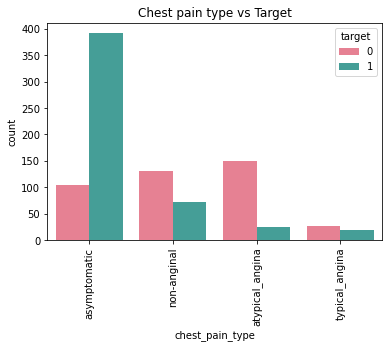

In [791]:
sns.countplot(x = "chest_pain_type", data = data, palette="husl", hue = "target", order = data["chest_pain_type"].value_counts().index)
plt.title("Chest pain type vs Target")
plt.xticks(rotation=90)
plt.savefig("CPTvsTarget.png", bbox_inches="tight")
plt.show()

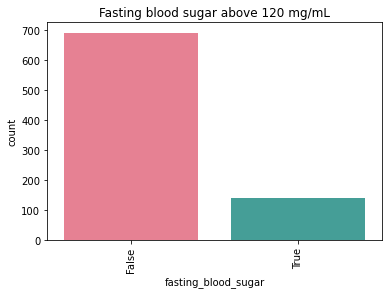

In [792]:
sns.countplot(x = "fasting_blood_sugar", data = data, palette="husl")
plt.title("Fasting blood sugar above 120 mg/mL")
plt.xticks(rotation=90)
plt.savefig("FastingBloodSugar.png", bbox_inches="tight")
plt.show()

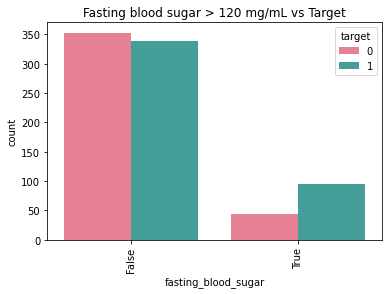

In [793]:
sns.countplot(x = "fasting_blood_sugar", data = data, palette="husl", hue = "target")
plt.title("Fasting blood sugar > 120 mg/mL vs Target")
plt.xticks(rotation=90)
plt.savefig("FBSvsTarget.png", bbox_inches="tight")
plt.show()


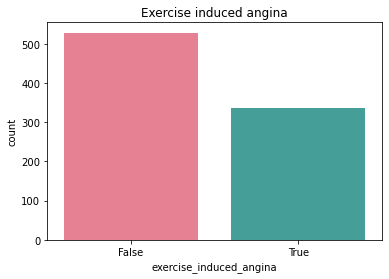

In [794]:
sns.countplot(x = "exercise_induced_angina", data = data, palette="husl")
plt.title("Exercise induced angina")
plt.savefig("exerciseInducedAngia.png", bbox_inches="tight")
plt.show()

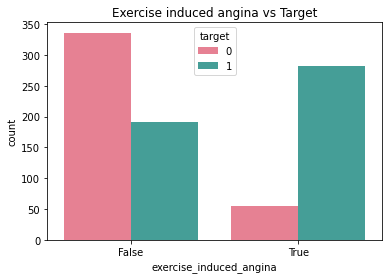

In [795]:
sns.countplot(x = "exercise_induced_angina", data = data, palette="husl", hue = "target", order = data["exercise_induced_angina"].value_counts().index)
plt.title("Exercise induced angina vs Target")
plt.savefig("ExerciseAngVsTarget.png", bbox_inches="tight")
plt.show()


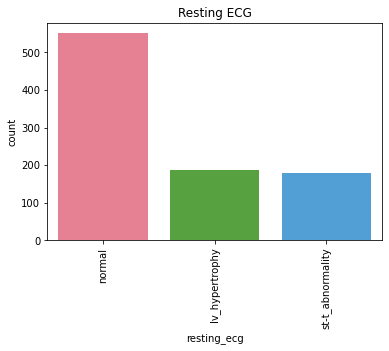

In [796]:
sns.countplot(x = "resting_ecg", data = data, palette="husl", order = data["resting_ecg"].value_counts().index)
plt.title("Resting ECG")
plt.xticks(rotation=90)
plt.savefig("restingECG.png", bbox_inches="tight")
plt.show()

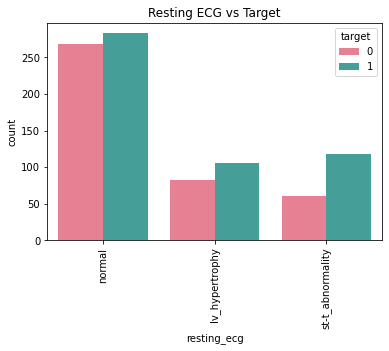

In [797]:
sns.countplot(x = "resting_ecg", data = data, palette="husl", hue = "target", order = data["resting_ecg"].value_counts().index)
plt.title("Resting ECG vs Target")
plt.xticks(rotation=90)
plt.savefig("restingECGvsTarget.png", bbox_inches="tight")
plt.show()

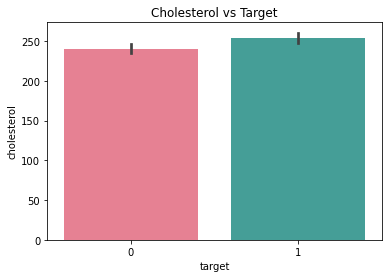

In [798]:
sns.barplot(y = "cholesterol", x = "target", data = data, palette="husl")
plt.title("Cholesterol vs Target")
plt.savefig("CholesterolVsTarget.png", bbox_inches="tight")
plt.show()

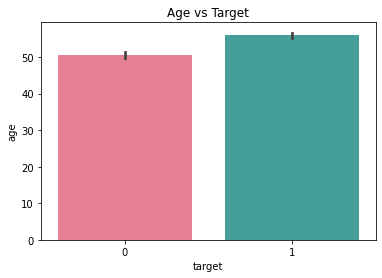

In [799]:
sns.barplot(y = "age", x = "target", data = data, palette="husl")
plt.title("Age vs Target")
plt.savefig("AgeVStarget.png", bbox_inches="tight")
plt.show()

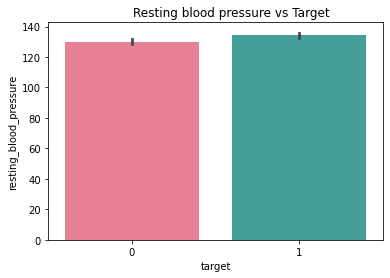

In [800]:
sns.barplot(y = "resting_blood_pressure", x = "target", data = data, palette="husl")
plt.title("        Resting blood pressure vs Target")
plt.savefig("restingBPvsTarget.png", bbox_inches="tight")
plt.show()

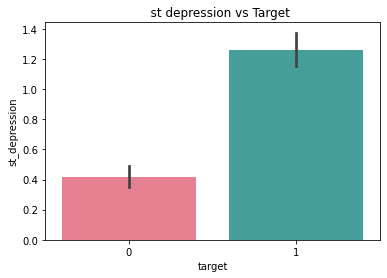

In [801]:
sns.barplot(y = "st_depression", x = "target", data = data, palette="husl")
plt.title("    st depression vs Target")
plt.savefig("STdrepresionVStarget.png", bbox_inches="tight")
plt.show()

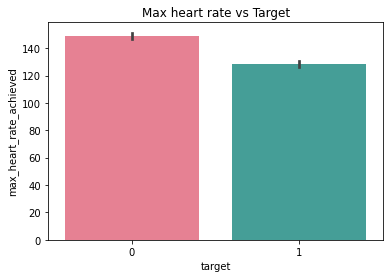

In [802]:
sns.barplot(y = "max_heart_rate_achieved", x = "target", data = data, palette="husl")
plt.title("Max heart rate vs Target")
plt.savefig("MaxHRvsTarget.png", bbox_inches="tight")
plt.show()

# Functions for confusion matrix and classification report

In [540]:
# Function for ConfusionMatrix. It takes 3 arguments, the true test values, the predicted values based on the model and the title of the plot
def conf_matrix(y_test, y_predicted, title):
    ConfusionMatrixDisplay.from_predictions(y_test, y_predicted, cmap= "Purples", display_labels=["No Disease","Disease"])
    plt.title(title)
    
    # Generate the filename based on the title
    filename = title.lower().replace(" ", "_") + ".png"
    
    # Save the figure with the generated filename
    plt.savefig(filename)
    
    plt.show()

# Function for classificationReport. Taking 2 arguments, the true test values and the predicted values based on the model.
def classReport(y_test, y_predicted):
    report = classification_report(y_test, y_predicted, digits=4)
    print(report)
    
# Function for calculating specificity. Taking 3 arguments, the true test values and the predicted values based on the model.
def cal_spec(y_test, y_predicted):
    cm = confusion_matrix(y_test, y_predicted)
    print("Specificity is: {:.2f}".format((cm[0][0])/(cm[0][0] + cm[0][1])))
    

# Scaling and OneHotEncoding

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [33]:
data_temp = data.copy() #Make a copy of the data set
data_temp.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,target
0,63,Male,typical_angina,145.0,233.0,True,lv_hypertrophy,150.0,False,2.3,0
1,67,Male,asymptomatic,160.0,286.0,False,lv_hypertrophy,108.0,True,1.5,1
2,67,Male,asymptomatic,120.0,229.0,False,lv_hypertrophy,129.0,True,2.6,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,41,Female,atypical_angina,130.0,204.0,False,lv_hypertrophy,172.0,False,1.4,0


In [34]:
 # The code for scaling and OhE will not run with these : "fasting_blood_sugar","exercise_induced_angina" 
 # I will try to change their True/False indicator. 
data_temp["fasting_blood_sugar"] = data_temp["fasting_blood_sugar"].replace([True], "diabetes")
data_temp["fasting_blood_sugar"] = data_temp["fasting_blood_sugar"].replace([False], "NoDiabetes")
data_temp["exercise_induced_angina"] = data_temp["exercise_induced_angina"].replace([True], "yes")
data_temp["exercise_induced_angina"] = data_temp["exercise_induced_angina"].replace([False], "no")

In [35]:
data_temp.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,target
0,63,Male,typical_angina,145.0,233.0,diabetes,lv_hypertrophy,150.0,no,2.3,0
1,67,Male,asymptomatic,160.0,286.0,NoDiabetes,lv_hypertrophy,108.0,yes,1.5,1
2,67,Male,asymptomatic,120.0,229.0,NoDiabetes,lv_hypertrophy,129.0,yes,2.6,1
3,37,Male,non-anginal,130.0,250.0,NoDiabetes,normal,187.0,no,3.5,0
4,41,Female,atypical_angina,130.0,204.0,NoDiabetes,lv_hypertrophy,172.0,no,1.4,0


# Split the data into input and targets. Input will be all the features except target and our output will be the target feature

In [36]:
X = data_temp.drop(columns=["target"]) #create a dataframe with all training data except the target column
#X.head(3) #check that the target variable has been removed

y = data_temp["target"].values #separate target values. 
#y[0:5] #view target values

In [37]:
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y, shuffle= True)

#Stratify will make sure that the proportions of disease/no disease is even between the split datasets
print(X_train.shape)
print(X_test.shape)

(736, 10)
(184, 10)


In [57]:
features_num = ["age", "resting_blood_pressure", "cholesterol", "max_heart_rate_achieved", "st_depression"]
features_cat = ["sex", "chest_pain_type","resting_ecg","fasting_blood_sugar", "exercise_induced_angina"]
features_cat

['sex',
 'chest_pain_type',
 'resting_ecg',
 'fasting_blood_sugar',
 'exercise_induced_angina']

In [39]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer

# Categorical pipeline
categorical_preprocessing = Pipeline(
[
    ('Imputation', SimpleImputer(strategy="most_frequent")),
    ('One Hot Encoding', OneHotEncoder(handle_unknown='ignore')),
]
)

# Numeric pipeline
numeric_preprocessing = Pipeline(
[
     ('Imputation', SimpleImputer(strategy='mean')),
     ('Scaling', StandardScaler())
]
)

# KNNImputer(n_neighbors=5) 

# Creating preprocessing pipeline
preprocessing = make_column_transformer(
     (numeric_preprocessing, ["age", "resting_blood_pressure", "cholesterol", "max_heart_rate_achieved", "st_depression"]),
     (categorical_preprocessing, ["sex", "chest_pain_type", "resting_ecg","fasting_blood_sugar","exercise_induced_angina" ]),
)

# Final pipeline
pipeline = Pipeline([
    ('Preprocessing', preprocessing)]
)


processedXtrain = pipeline.fit_transform(X_train)
processedXtest = pipeline.transform(X_test)      # Fit should not be used on the testing dataset. From what I can find, the fit can cause overfitting.


In [40]:
#I need to get the features names out of the pipeline. I need this for my DecisionTree implementation 

# Get the column transformer object
column_transformer = pipeline.named_steps['Preprocessing']

# Retrieve the categorical pipeline object
categorical_transformer = column_transformer.transformers_[1][1]

# Retrieve the feature column names for the categorical pipeline
categorical_feature_names = categorical_transformer.named_steps['One Hot Encoding'].get_feature_names_out(["sex", "chest_pain_type", "resting_ecg","fasting_blood_sugar","exercise_induced_angina" ])
#print(categorical_feature_names)

# Concatenate the feature column names
feature_names = ["age", "resting_blood_pressure", "cholesterol", "max_heart_rate_achieved", "st_depression"] + list(categorical_feature_names)

In [41]:
feature_names

['age',
 'resting_blood_pressure',
 'cholesterol',
 'max_heart_rate_achieved',
 'st_depression',
 'sex_Female',
 'sex_Male',
 'chest_pain_type_asymptomatic',
 'chest_pain_type_atypical_angina',
 'chest_pain_type_non-anginal',
 'chest_pain_type_typical_angina',
 'resting_ecg_lv_hypertrophy',
 'resting_ecg_normal',
 'resting_ecg_st-t_abnormality',
 'fasting_blood_sugar_NoDiabetes',
 'fasting_blood_sugar_diabetes',
 'exercise_induced_angina_no',
 'exercise_induced_angina_yes']

In [54]:
pipeline

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('Imputation',
                                                                   SimpleImputer()),
                                                                  ('Scaling',
                                                                   StandardScaler())]),
                                                  ['age',
                                                   'resting_blood_pressure',
                                                   'cholesterol',
                                                   'max_heart_rate_achieved',
                                                   'st_depression']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('Imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('One Hot '
                                                                   'Encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'chest_pain_type',
                                                   'resting_ecg',
                                                   'fasting_blood_sugar',
                                                   'exercise_induced_angina'])]))])

In [45]:
feature_names

['age',
 'resting_blood_pressure',
 'cholesterol',
 'max_heart_rate_achieved',
 'st_depression',
 'sex_Female',
 'sex_Male',
 'chest_pain_type_asymptomatic',
 'chest_pain_type_atypical_angina',
 'chest_pain_type_non-anginal',
 'chest_pain_type_typical_angina',
 'resting_ecg_lv_hypertrophy',
 'resting_ecg_normal',
 'resting_ecg_st-t_abnormality',
 'fasting_blood_sugar_NoDiabetes',
 'fasting_blood_sugar_diabetes',
 'exercise_induced_angina_no',
 'exercise_induced_angina_yes']

# Testing different models

In [46]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import make_scorer, f1_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# KNN

In [58]:
## Old code
knnFirst = KNeighborsClassifier()
# knnFirst.fit(processedXtrain, y_train)
# print("accuracy for train: {:.2f}".format(knnFirst.score(processedXtrain, y_train)))
# print("accuracy for test: {:.2f}".format(knnFirst.score(processedXtest, y_test)))
# y_predTestFirst = knnFirst.predict(processedXtest)


# pipeline used to preprocess all the data, using the previusly defined preprocessing step, for scaling, OHE and imputation. Added is the specific classifier used to gain the results.
kNNFirstpipeline = Pipeline([
    ("Preprocessing", preprocessing),
    ("Classifier", knnFirst)
])


knnFirstScores = cross_validate(kNNFirstpipeline, X, y, cv=10, return_train_score=True) 
print(knnFirstScores["train_score"].mean())
print(knnFirstScores["test_score"].mean())

y_predFirstkNN = cross_val_predict(kNNFirstpipeline, X, y, cv=10)

0.8526570048309179
0.7880434782608695


In [48]:
print("Performance of default kNN")
print(classification_report(y, y_predFirstkNN)) #Classification Report

Performance of default kNN
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       411
           1       0.79      0.85      0.82       509

    accuracy                           0.79       920
   macro avg       0.79      0.78      0.78       920
weighted avg       0.79      0.79      0.79       920



# Logistic Regression

In [ ]:
logicRegClassifier = LogisticRegression() # Create logistic regression classifier

logRegFirstpipeline = Pipeline([
    ("Preprocessing", preprocessing),
    ("Classifier", logicRegClassifier)
])

logRegFirstScores = cross_validate(logRegFirstpipeline, X, y, cv=10, return_train_score=True) 
print(logRegFirstScores["train_score"].mean())
print(logRegFirstScores["test_score"].mean())


y_predFirstlogReg = cross_val_predict(logRegFirstpipeline, X, y, cv=10)

In [ ]:
print("Performance of default Logistic Regression")
print(classification_report(y, y_predFirstlogReg )) #Classification Report

# Decision Tree

In [ ]:
## Old code
treeFirst = DecisionTreeClassifier(random_state= 1) # Create tree classifier
# treeClassifier = DecisionTreeClassifier(random_state= 1) # Create tree classifier
# treeClassifier.fit(processedXtrain, y_train) # Fit the classifier to the data
# print("accuracy for train: {:.2f}".format(treeClassifier.score(processedXtrain, y_train)))
# print("accuracy for test: {:.2f}".format(treeClassifier.score(processedXtest, y_test)))
# y_pred_tree = treeClassifier.predict(processedXtest)



treeFirstpipeline = Pipeline([
    ("Preprocessing", preprocessing),
    ("Classifier", treeFirst)
])

treeFirstScores = cross_validate(treeFirstpipeline, X, y, cv=10, return_train_score=True) 
print(treeFirstScores["train_score"].mean())
print(treeFirstScores["test_score"].mean())


y_predFirsttree = cross_val_predict(treeFirstpipeline, X, y, cv=10)

In [ ]:
print("Performance of default Decision Tree")
print(classification_report(y, y_predFirsttree)) #Classification Report

In [ ]:
# How/can I plot after cros_validate? In there the data gets fitted each time they are cross validated. How can I "fit" that to a variable that I can plot?
# Or should I just plot with the (processedXtrain, y_train), like I did before? 


#from sklearn import tree
#from matplotlib import pyplot as plt

#fig = plt.figure(figsize=(25,20))
#_ = tree.plot_tree(treeFirstScores, 
#                   feature_names=feature_names,  
#                   class_names={0: "No Disease", 1: "Disease"},
#                   filled=True,
#                  fontsize = 12)

## Random Forest

In [ ]:
##Old code
randomFclassifier = RandomForestClassifier(random_state=1)
#randomFclassifier.fit(processedXtrain, y_train)
#print("accuracy for train: {:.2f}".format(randomFclassifier.score(processedXtrain, y_train)))
#print("accuracy for test: {:.2f}".format(randomFclassifier.score(processedXtest, y_test)))
#y_pred_randomF = logicRegClassifier.predict(processedXtest)

rfFirstpipeline = Pipeline([
    ("Preprocessing", preprocessing),
    ("Classifier", randomFclassifier)
])

rfFirstScores = cross_validate(rfFirstpipeline, X, y, cv=10, return_train_score=True) 
print(rfFirstScores["train_score"].mean())
print(rfFirstScores["test_score"].mean())


y_predFirstRF = cross_val_predict(rfFirstpipeline, X, y, cv=10)

In [ ]:
print("Performance of default Random Forest")
classReport(y, y_predFirstRF)

## XGBoost

In [ ]:
from xgboost import XGBClassifier

In [541]:
xgBclassifier = XGBClassifier(random_state = 1)

xgFirstpipeline = Pipeline([
    ("Preprocessing", preprocessing),
    ("Classifier", xgBclassifier)
])

xgFirstScores = cross_validate(xgFirstpipeline, X, y, cv=10, return_train_score=True)
print(xgFirstScores["train_score"].mean())
print(xgFirstScores["test_score"].mean())

y_predFirstxgB = cross_val_predict(xgFirstpipeline, X, y, cv=10)

0.99987922705314
0.7336956521739131


In [542]:
print("Performance of default XGBoost")
classReport(y, y_predFirstxgB)

Performance of default XGBoost
              precision    recall  f1-score   support

           0     0.7044    0.6959    0.7001       411
           1     0.7568    0.7642    0.7605       509

    accuracy                         0.7337       920
   macro avg     0.7306    0.7301    0.7303       920
weighted avg     0.7334    0.7337    0.7335       920



# Models after Parameter Optimization

In [ ]:
#accuracy              = (TP+TN)/(TP+TN+FP+FN)   
#precision             = TP/(TP+FP)  

#Sensitivity/recall    = TP/(TP+FN)
#Specificity           = TN/(TN+FP)
#F1-score

Accuracy: Score is an evaluation metric that measures the number of correct predictions made by a model in relation to the total number of predictions made

Precision: Precision is a measure of how many of the positive predictions made by the model are actually correct. When it predicts yes/1, how often is it then correct.

Recall/Sensitivity: Recall is a measure of how many of the actual positive cases are correctly identified by the model. Ratio of true positives to total (actual) positives in the data. How many of the TP can we find.

Specificity: Specificity is the Ratio of true negatives to total negatives in the data. How many of the TN can we find.

F1-score: F1-score is a weighted average of precision and recall, calculated as 2 times the product of precision and recall divided by their sum. Accuracy



## Performance metric

In [51]:
# dictionary for the scoring metrics to report. Used for all of the models
scoring = {
    "f1_weighted": make_scorer(f1_score, average="weighted"), 
    "sensitivity": make_scorer(recall_score, pos_label=1),
    "specificity": make_scorer(recall_score, pos_label=0),
    "accuracy": "accuracy",
    "roc_auc": "roc_auc"
}

# Define the number of folds used. This will be used when doing cross validating
n_splits10 = 10
n_splits5 = 5
n_splits3 = 3

# Create a StratifiedKFold object. This will be used when doing cross validating
skf10 = StratifiedKFold(n_splits=n_splits10, shuffle=True, random_state=1)
skf5 = StratifiedKFold(n_splits=n_splits5, shuffle=True, random_state=1)
skf3 = StratifiedKFold(n_splits=n_splits3, shuffle=True, random_state=1)

# k-nearest neighbors (kNN)

## GridSearchCV kNN

In [510]:
#Changes, I use gridsearch with pipeline, to make sure the splits inside the GridSearch are preprocessed the right way

#Classifier object
knnSearch = KNeighborsClassifier()

# pipeline used to preprocess all the data, using the previusly defined preprocessing step, for scaling, OHE and imputation. Added is the specific classifier used to gain the results.
kNNpipeline = Pipeline([
    ("Preprocessing", preprocessing),
    ("Classifier", knnSearch)
])
param_grid = {"Classifier__n_neighbors": range(1, 16)}

knn_grid = GridSearchCV(kNNpipeline, param_grid, cv=skf10, scoring = scoring, return_train_score=True, refit = "sensitivity")
knn_grid.fit(X_train, y_train) #fit model to data

print(knn_grid.best_params_)
print(knn_grid.best_score_)


#kNNBestParams = knn_grid.best_params_ # I am making a variable to hold the best parameters. That way I can just input this into the classifier later. 

{'Classifier__n_neighbors': 13}
0.8476219512195122


In [511]:
# Estimation of the models performance on new unseen data, based upon 10-fold cross-validation

# Retrieve the results

############ Test
## Save the results into variables
# Mean Performance
kNNf1Test = round(knn_grid.cv_results_['mean_test_f1_weighted'][knn_grid.best_index_] * 100, 2)
kNNSensitivityTest = round(knn_grid.cv_results_['mean_test_sensitivity'][knn_grid.best_index_] * 100, 2)
kNNSpecificityTest = round(knn_grid.cv_results_['mean_test_specificity'][knn_grid.best_index_] * 100, 2)
kNNAccuracyTest = round(knn_grid.cv_results_['mean_test_accuracy'][knn_grid.best_index_] * 100, 2)
kNNrocAucTest = round(knn_grid.cv_results_['mean_test_roc_auc'][knn_grid.best_index_], 4)

#Std
kNNf1Test_std = round(knn_grid.cv_results_['std_test_f1_weighted'][knn_grid.best_index_], 4)
kNNSensitivityTest_std = round(knn_grid.cv_results_['std_test_sensitivity'][knn_grid.best_index_], 4)
kNNSpecificityTest_std = round(knn_grid.cv_results_['std_test_specificity'][knn_grid.best_index_], 4)
kNNAccuracyTest_std = round(knn_grid.cv_results_['std_test_accuracy'][knn_grid.best_index_], 4)
kNNrocAucTest_std = round(knn_grid.cv_results_['std_test_roc_auc'][knn_grid.best_index_] * 100, 4)

# Show results
print("Test/Validation Set Performance Metrics kNN:")
print(f"F1-score (WA): {kNNf1Test}%")
print(f"Sensitivity: {kNNSensitivityTest}%")
print(f"Specificity: {kNNSpecificityTest}%")
print(f"Accuracy: {kNNAccuracyTest}%")
print(f"roc_auc: {kNNrocAucTest}")
print()
print(f"F1-score (WA) STD: {kNNf1Test_std}")
print(f"Sensitivity STD: {kNNSensitivityTest_std}")
print(f"Specificity STD: {kNNSpecificityTest_std}")
print(f"Accuracy STD: {kNNAccuracyTest_std}")
print(f"roc_auc STD: {kNNrocAucTest_std}")

############ Train
## Save the results into variables
# Mean Performance
kNNf1Train = round(knn_grid.cv_results_['mean_train_f1_weighted'][knn_grid.best_index_] * 100, 2)
kNNSensitivityTrain = round(knn_grid.cv_results_['mean_train_sensitivity'][knn_grid.best_index_] * 100, 2)
kNNSpecificityTrain = round(knn_grid.cv_results_['mean_train_specificity'][knn_grid.best_index_] * 100, 2)
kNNAccuracyTrain = round(knn_grid.cv_results_['mean_train_accuracy'][knn_grid.best_index_] * 100, 2)
kNNrocAucTrain = round(knn_grid.cv_results_['mean_train_roc_auc'][knn_grid.best_index_], 4)

#Std
kNNf1Train_std = round(knn_grid.cv_results_['std_train_f1_weighted'][knn_grid.best_index_], 4)
kNNSensitivityTrain_std = round(knn_grid.cv_results_['std_train_sensitivity'][knn_grid.best_index_], 4)
kNNSpecificityTrain_std = round(knn_grid.cv_results_['std_train_specificity'][knn_grid.best_index_], 4)
kNNAccuracyTrain_std = round(knn_grid.cv_results_['std_train_accuracy'][knn_grid.best_index_], 4)
kNNrocAucTrain_std = round(knn_grid.cv_results_['std_train_roc_auc'][knn_grid.best_index_] * 100, 4)

# Show results
print("\nTraining Set Performance Metrics kNN:")
print(f"F1-score (WA): {kNNf1Train}%")
print(f"Sensitivity: {kNNSensitivityTrain}%")
print(f"Specificity: {kNNSpecificityTrain}%")
print(f"Accuracy: {kNNAccuracyTrain}%")
print(f"roc_auc: {kNNrocAucTrain}")
print()
print(f"F1-score (WA) STD: {kNNf1Train_std}")
print(f"Sensitivity STD: {kNNSensitivityTrain_std}")
print(f"Specificity STD: {kNNSpecificityTrain_std}")
print(f"Accuracy STD: {kNNAccuracyTrain_std}")
print(f"roc_auc STD: {kNNrocAucTrain_std}")

Test/Validation Set Performance Metrics kNN:
F1-score (WA): 78.35%
Sensitivity: 84.76%
Specificity: 70.8%
Accuracy: 78.53%
roc_auc: 0.8577

F1-score (WA) STD: 0.0562
Sensitivity STD: 0.0502
Specificity STD: 0.0757
Accuracy STD: 0.0556
roc_auc STD: 4.5442

Training Set Performance Metrics kNN:
F1-score (WA): 82.18%
Sensitivity: 88.04%
Specificity: 75.21%
Accuracy: 82.31%
roc_auc: 0.904

F1-score (WA) STD: 0.0075
Sensitivity STD: 0.0085
Specificity STD: 0.0174
Accuracy STD: 0.0072
roc_auc STD: 0.4665


              precision    recall  f1-score   support

           0     0.8571    0.8049    0.8302        82
           1     0.8505    0.8922    0.8708       102

    accuracy                         0.8533       184
   macro avg     0.8538    0.8485    0.8505       184
weighted avg     0.8534    0.8533    0.8527       184



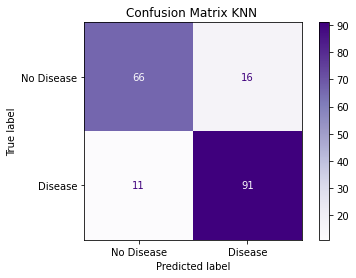

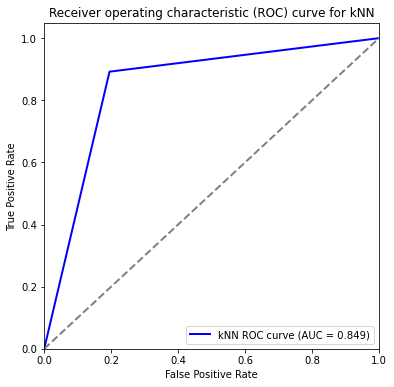

In [810]:
# Prediction on holdout test set
best_model_kNN = knn_grid.best_estimator_
y_predkNNgs = best_model_kNN.predict(X_test)

# class report
classReport(y_test, y_predkNNgs)

# Visualize the confusion matrix
conf_matrix(y_test, y_predkNNgs, "Confusion Matrix KNN ")

# calculate false positive rate (fpr), true positive rate (tpr), and thresholds. It will return three arrays
fprkNN, tprkNN, thresholdskNN = roc_curve(y_test, y_predkNNgs)

# calculate the area under the curve (AUC)
roc_auckNN = auc(fprkNN, tprkNN)

# plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fprkNN, tprkNN, color="blue", lw=2, label="kNN ROC curve (AUC = %0.3f)" % roc_auckNN)
plt.plot([0, 1], [0, 1], color="grey", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic (ROC) curve for kNN")
plt.legend(loc="lower right")
plt.show()

# Logistic Regression

## GridSearchCV Logistic Regression

In [122]:
#Changes, I use gridsearch with pipeline, to make sure the splits inside the GridSearch are preprocessed the right way

#Classifier object
logicRegSearch = LogisticRegression() # Create logistic regression classifier

# pipeline used to preprocess all the data, using the previusly defined preprocessing step, for scaling, OHE and imputation. Added is the specific classifier used to gain the results.
logRegPipeline = Pipeline([
    ("Preprocessing", preprocessing),
    ("Classifier", logicRegSearch)
])


# Define the grid of hyperparameters to search
param_grid_LogReg = {"Classifier__C": [0.1, 0.25, 0.5, 0.75, 1.0, 1.5],
                    "Classifier__penalty": ["l1","l2"],
                    "Classifier__max_iter": [50,100, 500, 1000],
                    "Classifier__solver": ["lbfgs","liblinear"]}
                    

logReg_grid = GridSearchCV(logRegPipeline, param_grid_LogReg, cv=skf10, scoring = scoring, return_train_score=True, refit = "sensitivity")
logReg_grid.fit(X_train, y_train) #fit model to data    


print(logReg_grid.best_params_)
print(logReg_grid.best_score_)

{'Classifier__C': 0.5, 'Classifier__max_iter': 50, 'Classifier__penalty': 'l2', 'Classifier__solver': 'liblinear'}
0.8184146341463414


C:\Users\traan\.conda\envs\aiforhealth\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
240 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\traan\.conda\envs\aiforhealth\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\traan\.conda\envs\aiforhealth\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\traan\.conda\envs\aiforhealth\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in

In [123]:
# Retrieve the results

############ Test
## Save the results into variables
# Mean Performance
logRegf1Test = round(logReg_grid.cv_results_['mean_test_f1_weighted'][logReg_grid.best_index_] * 100, 2)
logRegSensitivityTest = round(logReg_grid.cv_results_['mean_test_sensitivity'][logReg_grid.best_index_] * 100, 2)
logRegSpecificityTest = round(logReg_grid.cv_results_['mean_test_specificity'][logReg_grid.best_index_] * 100, 2)
logRegAccuracyTest = round(logReg_grid.cv_results_['mean_test_accuracy'][logReg_grid.best_index_] * 100, 2)

#Std
logRegf1Test_std = round(logReg_grid.cv_results_['std_test_f1_weighted'][logReg_grid.best_index_], 4)
logRegSensitivityTest_std = round(logReg_grid.cv_results_['std_test_sensitivity'][logReg_grid.best_index_], 4)
logRegSpecificityTest_std = round(logReg_grid.cv_results_['std_test_specificity'][logReg_grid.best_index_], 4)
logRegAccuracyTest_std = round(logReg_grid.cv_results_['std_test_accuracy'][logReg_grid.best_index_], 4)

# Show results
print("Test/Validation Set Performance Metrics Logistic Regression:")
print(f"F1-score (WA): {logRegf1Test}%")
print(f"Sensitivity: {logRegSensitivityTest}%")
print(f"Specificity: {logRegSpecificityTest}%")
print(f"Accuracy: {logRegAccuracyTest}%")
print()
print(f"F1-score (WA) STD: {logRegf1Test_std}")
print(f"Sensitivity STD: {logRegSensitivityTest_std}")
print(f"Specificity STD: {logRegSpecificityTest_std}")
print(f"Accuracy STD: {logRegAccuracyTest_std}")


# Retrieve the training set results
############ Training
## Save the results into variables
# Mean Performance
logRegf1Train = round(logReg_grid.cv_results_['mean_train_f1_weighted'][logReg_grid.best_index_] * 100, 2)
logRegSensitivityTrain = round(logReg_grid.cv_results_['mean_train_sensitivity'][logReg_grid.best_index_] * 100, 2)
logRegSpecificityTrain = round(logReg_grid.cv_results_['mean_train_specificity'][logReg_grid.best_index_] * 100, 2)
logRegAccuracyTrain = round(logReg_grid.cv_results_['mean_train_accuracy'][logReg_grid.best_index_] * 100, 2)

#Std
logRegf1Train_std = round(logReg_grid.cv_results_['std_train_f1_weighted'][logReg_grid.best_index_], 4)
logRegSensitivityTrain_std = round(logReg_grid.cv_results_['std_train_sensitivity'][logReg_grid.best_index_], 4)
logRegSpecificityTrain_std = round(logReg_grid.cv_results_['std_train_specificity'][logReg_grid.best_index_], 4)
logRegAccuracyTrain_std = round(logReg_grid.cv_results_['std_train_accuracy'][logReg_grid.best_index_], 4)

# Show results 
print("\nTraining Set Performance Metrics Logistic Regression:")
print(f"F1-score (WA): {logRegf1Train}%")
print(f"Sensitivity: {logRegSensitivityTrain}%")
print(f"Specificity: {logRegSpecificityTrain}%")
print(f"Accuracy: {logRegAccuracyTrain}%")
print()
print(f"F1-score (WA) STD: {logRegf1Train_std}")
print(f"Sensitivity STD: {logRegSensitivityTrain_std}")
print(f"Specificity STD: {logRegSpecificityTrain_std}")
print(f"Accuracy STD: {logRegAccuracyTrain_std}")


Test/Validation Set Performance Metrics Logistic Regression:
F1-score (WA): 78.48%
Sensitivity: 81.84%
Specificity: 74.44%
Accuracy: 78.54%

F1-score (WA) STD: 0.0628
Sensitivity STD: 0.0681
Specificity STD: 0.0756
Accuracy STD: 0.0628

Training Set Performance Metrics Logistic Regression:
F1-score (WA): 79.69%
Sensitivity: 83.35%
Specificity: 75.28%
Accuracy: 79.74%

F1-score (WA) STD: 0.0077
Sensitivity STD: 0.0074
Specificity STD: 0.0103
Accuracy STD: 0.0076


              precision    recall  f1-score   support

           0     0.8077    0.7683    0.7875        82
           1     0.8208    0.8529    0.8365       102

    accuracy                         0.8152       184
   macro avg     0.8142    0.8106    0.8120       184
weighted avg     0.8149    0.8152    0.8147       184



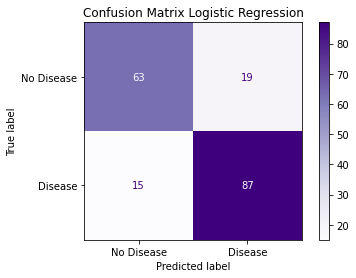

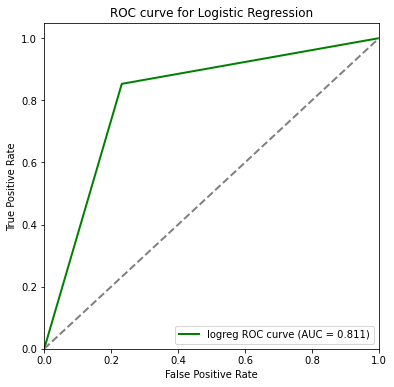

In [811]:
# Prediction on holdout test set
best_model_logreg = logReg_grid.best_estimator_
y_predLogReg = best_model_logreg.predict(X_test)

# class report
classReport(y_test, y_predLogReg)

# Visualize the confusion matrix
conf_matrix(y_test, y_predLogReg, "Confusion Matrix Logistic Regression")

# calculate false positive rate (fpr), true positive rate (tpr), and thresholds. It will return three arrays
fprlogreg, tprlogreg, thresholdslogreg = roc_curve(y_test, y_predLogReg)

# calculate the area under the curve (AUC)
roc_auclogreg = auc(fprlogreg, tprlogreg)

# plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fprlogreg, tprlogreg, color="green", lw=2, label="logreg ROC curve (AUC = %0.3f)" % roc_auclogreg)
plt.plot([0, 1], [0, 1], color="grey", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for Logistic Regression")
plt.legend(loc="lower right")
plt.show()

# DecisionTree

## GridSearchCV DecisionTree

In [126]:
#Classifier object
treeClassifierSearch = DecisionTreeClassifier(random_state=1)

# pipeline used to preprocess all the data, using the previusly defined preprocessing step, for scaling, OHE and imputation. Added is the specific classifier used to gain the results.
DecTreePipeline = Pipeline([
    ("Preprocessing", preprocessing),
    ("Classifier", treeClassifierSearch)
])

# Define the grid of hyperparameters to search
param_grid_DecTree = {"Classifier__max_depth": [4,6,8],
                     "Classifier__ccp_alpha": [0.0, 0.001, 0.005],
                     "Classifier__min_samples_leaf": [2, 4, 6],
                     "Classifier__min_samples_split": [4, 6, 8],
                     "Classifier__max_features": ("sqrt","log2"),
                     "Classifier__max_leaf_nodes": [30, 40, 50]}


grid_DecTree = GridSearchCV(DecTreePipeline, param_grid_DecTree, cv=skf10, scoring = scoring, return_train_score=True, refit = "sensitivity")
grid_DecTree.fit(X_train, y_train) #fit model to data 



print("Best hyperparameters: ", grid_DecTree.best_params_)
print("Best score: ", grid_DecTree.best_score_)

Best hyperparameters:  {'Classifier__ccp_alpha': 0.0, 'Classifier__max_depth': 8, 'Classifier__max_features': 'sqrt', 'Classifier__max_leaf_nodes': 30, 'Classifier__min_samples_leaf': 6, 'Classifier__min_samples_split': 4}
Best score:  0.8180487804878049


## DecisionTree after GridSearch

In [127]:
# Retrieve the results
############ Test
## Save the results into variables
# Mean Performance
treef1Test = round(grid_DecTree.cv_results_['mean_test_f1_weighted'][grid_DecTree.best_index_] * 100, 2)
treeSensitivityTest = round(grid_DecTree.cv_results_['mean_test_sensitivity'][grid_DecTree.best_index_] * 100, 2)
treeSpecificityTest = round(grid_DecTree.cv_results_['mean_test_specificity'][grid_DecTree.best_index_] * 100, 2)
treeAccuracyTest = round(grid_DecTree.cv_results_['mean_test_accuracy'][grid_DecTree.best_index_] * 100, 2)

#Std
treef1Test_std = round(grid_DecTree.cv_results_['std_test_f1_weighted'][grid_DecTree.best_index_], 4)
treeSensitivityTest_std = round(grid_DecTree.cv_results_['std_test_sensitivity'][grid_DecTree.best_index_], 4)
treeSpecificityTest_std = round(grid_DecTree.cv_results_['std_test_specificity'][grid_DecTree.best_index_], 4)
treeAccuracyTest_std = round(grid_DecTree.cv_results_['std_test_accuracy'][grid_DecTree.best_index_], 4)

# Show results
print("Test/Validation Set Performance Metrics Decision Tree:")
print(f"F1-score (WA): {treef1Test}%")
print(f"Sensitivity: {treeSensitivityTest}%")
print(f"Specificity: {treeSpecificityTest}%")
print(f"Accuracy: {treeAccuracyTest}%")
print()
print(f"F1-score (WA) STD: {treef1Test_std}")
print(f"Sensitivity STD: {treeSensitivityTest_std}")
print(f"Specificity STD: {treeSpecificityTest_std}")
print(f"Accuracy STD: {treeAccuracyTest_std}")


# Retrieve the training set results
############ Training
## Save the results into variables
# Mean Performance
treef1Train = round(grid_DecTree.cv_results_['mean_train_f1_weighted'][grid_DecTree.best_index_] * 100, 2)
treeSensitivityTrain = round(grid_DecTree.cv_results_['mean_train_sensitivity'][grid_DecTree.best_index_] * 100, 2)
treeSpecificityTrain = round(grid_DecTree.cv_results_['mean_train_specificity'][grid_DecTree.best_index_] * 100, 2)
treeAccuracyTrain = round(grid_DecTree.cv_results_['mean_train_accuracy'][grid_DecTree.best_index_] * 100, 2)

#Std
treef1Train_std = round(grid_DecTree.cv_results_['std_train_f1_weighted'][grid_DecTree.best_index_], 4)
treeSensitivityTrain_std = round(grid_DecTree.cv_results_['std_train_sensitivity'][grid_DecTree.best_index_], 4)
treeSpecificityTrain_std = round(grid_DecTree.cv_results_['std_train_specificity'][grid_DecTree.best_index_], 4)
treeAccuracyTrain_std = round(grid_DecTree.cv_results_['std_train_accuracy'][grid_DecTree.best_index_], 4)

# Show results 
print("\nTraining Set Performance Metrics Decision Tree:")
print(f"F1-score (WA): {treef1Train}%")
print(f"Sensitivity: {treeSensitivityTrain}%")
print(f"Specificity: {treeSpecificityTrain}%")
print(f"Accuracy: {treeAccuracyTrain}%")
print()
print(f"F1-score (WA) STD: {treef1Train_std}")
print(f"Sensitivity STD: {treeSensitivityTrain_std}")
print(f"Specificity STD: {treeSpecificityTrain_std}")
print(f"Accuracy STD: {treeAccuracyTrain_std}")


Test/Validation Set Performance Metrics Decision Tree:
F1-score (WA): 76.19%
Sensitivity: 81.8%
Specificity: 69.91%
Accuracy: 76.5%

F1-score (WA) STD: 0.0525
Sensitivity STD: 0.0806
Specificity STD: 0.1122
Accuracy STD: 0.0507

Training Set Performance Metrics Decision Tree:
F1-score (WA): 80.85%
Sensitivity: 84.55%
Specificity: 76.49%
Accuracy: 80.95%

F1-score (WA) STD: 0.0163
Sensitivity STD: 0.0367
Specificity STD: 0.0587
Accuracy STD: 0.0154


              precision    recall  f1-score   support

           0     0.7875    0.7683    0.7778        82
           1     0.8173    0.8333    0.8252       102

    accuracy                         0.8043       184
   macro avg     0.8024    0.8008    0.8015       184
weighted avg     0.8040    0.8043    0.8041       184



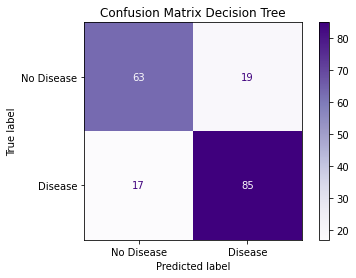

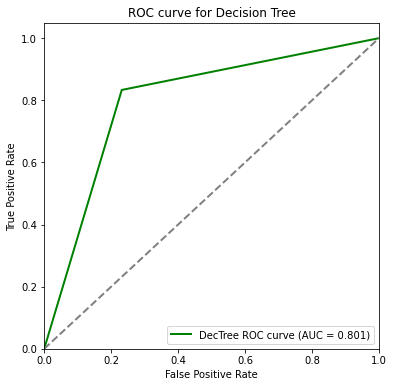

In [812]:
# Prediction on holdout test set
best_model_decTree = grid_DecTree.best_estimator_
y_predDecTree = best_model_decTree.predict(X_test)

# class report
classReport(y_test, y_predDecTree)

# Visualize the confusion matrix
conf_matrix(y_test, y_predDecTree, "Confusion Matrix Decision Tree")

# calculate false positive rate (fpr), true positive rate (tpr), and thresholds. It will return three arrays
fprDecTree, tprDecTree, thresholdsDecTree = roc_curve(y_test, y_predDecTree)

# calculate the area under the curve (AUC)
roc_aucDecTree = auc(fprDecTree, tprDecTree)

# plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fprDecTree, tprDecTree, color="green", lw=2, label="DecTree ROC curve (AUC = %0.3f)" % roc_aucDecTree)
plt.plot([0, 1], [0, 1], color="grey", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for Decision Tree")
plt.legend(loc="lower right")
plt.show()

# Random Forest

## GridSearchCV Random Forest

In [138]:
#Classifier object
randomForestSearch = RandomForestClassifier(random_state=1) # Create classifier

# pipeline used to preprocess all the data, using the previusly defined preprocessing step, for scaling, OHE and imputation. Added is the specific classifier used to gain the results.
rfPipeline = Pipeline([
    ("Preprocessing", preprocessing),
    ("Classifier", randomForestSearch)
])

# Define the grid of hyperparameters to search
param_grid_forest = {
    "Classifier__ccp_alpha": [0.0, 0.001], 
    "Classifier__n_estimators": [100, 150, 200],
    "Classifier__min_samples_split": [2,4,6],
    "Classifier__min_samples_leaf": [1,2,4],
    "Classifier__max_depth": [4,6,8],
    "Classifier__max_leaf_nodes": [20,30,40]
};

# I have tried with 10xcv instead of 5, but the overall performance dosent get better. Some of the metrics increase a litte bit and others decrease. Its not worth the extra computational time atm.

# Create a grid search object
grid_random_forest =  GridSearchCV(rfPipeline, param_grid_forest, cv=skf5, scoring = scoring, return_train_score=True, refit = "sensitivity")
grid_random_forest.fit(X_train, y_train) #fit model to data 

print("Best hyperparameters: ", grid_random_forest.best_params_)
print("Best score: ", grid_random_forest.best_score_)



Best hyperparameters:  {'Classifier__ccp_alpha': 0.0, 'Classifier__max_depth': 8, 'Classifier__max_leaf_nodes': 20, 'Classifier__min_samples_leaf': 4, 'Classifier__min_samples_split': 2, 'Classifier__n_estimators': 200}
Best score:  0.8550436615477267


## Random Forest after GridSearch

In [139]:
# Retrieve the results

############ Test
## Save the results into variables
# Mean Performance
RFf1Test = round(grid_random_forest.cv_results_['mean_test_f1_weighted'][grid_random_forest.best_index_] * 100, 2)
RFSensitivityTest = round(grid_random_forest.cv_results_['mean_test_sensitivity'][grid_random_forest.best_index_] * 100, 2)
RFSpecificityTest = round(grid_random_forest.cv_results_['mean_test_specificity'][grid_random_forest.best_index_] * 100, 2)
RFAccuracyTest = round(grid_random_forest.cv_results_['mean_test_accuracy'][grid_random_forest.best_index_] * 100, 2)

# Std
RFf1Test_std = round(grid_random_forest.cv_results_['std_test_f1_weighted'][grid_random_forest.best_index_], 4)
RFSensitivityTest_std = round(grid_random_forest.cv_results_['std_test_sensitivity'][grid_random_forest.best_index_], 4)
RFSpecificityTest_std = round(grid_random_forest.cv_results_['std_test_specificity'][grid_random_forest.best_index_], 4)
RFAccuracyTest_std = round(grid_random_forest.cv_results_['std_test_accuracy'][grid_random_forest.best_index_], 4)

# Show results
print("Test/Validation Set Performance Metrics Random Forest:")
print(f"F1-score (WA): {RFf1Test}%")
print(f"Sensitivity: {RFSensitivityTest}%")
print(f"Specificity: {RFSpecificityTest}%")
print(f"Accuracy: {RFAccuracyTest}%")
print()
print(f"F1-score (WA) STD: {RFf1Test_std}")
print(f"Sensitivity STD: {RFSensitivityTest_std}")
print(f"Specificity STD: {RFSpecificityTest_std}")
print(f"Accuracy STD: {RFAccuracyTest_std}")



############ Training
## Save the results into variables
# Mean Performance
RFf1Train = round(grid_random_forest.cv_results_['mean_train_f1_weighted'][grid_random_forest.best_index_] * 100, 2)
RFSensitivityTrain = round(grid_random_forest.cv_results_['mean_train_sensitivity'][grid_random_forest.best_index_] * 100, 2)
RFSpecificityTrain = round(grid_random_forest.cv_results_['mean_train_specificity'][grid_random_forest.best_index_] * 100, 2)
RFAccuracyTrain = round(grid_random_forest.cv_results_['mean_train_accuracy'][grid_random_forest.best_index_] * 100, 2)

# Std
RFf1Train_std = round(grid_random_forest.cv_results_['std_train_f1_weighted'][grid_random_forest.best_index_], 4)
RFSensitivityTrain_std = round(grid_random_forest.cv_results_['std_train_sensitivity'][grid_random_forest.best_index_], 4)
RFSpecificityTrain_std = round(grid_random_forest.cv_results_['std_train_specificity'][grid_random_forest.best_index_], 4)
RFAccuracyTrain_std = round(grid_random_forest.cv_results_['std_train_accuracy'][grid_random_forest.best_index_], 4)

# Show results 
print("\nTraining Set Performance Metrics Random Forest:")
print(f"F1-score (WA): {RFf1Train}%")
print(f"Sensitivity: {RFSensitivityTrain}%")
print(f"Specificity: {RFSpecificityTrain}%")
print(f"Accuracy: {RFAccuracyTrain}%")
print()
print(f"F1-score (WA) STD: {RFf1Train_std}")
print(f"Sensitivity STD: {RFSensitivityTrain_std}")
print(f"Specificity STD: {RFSpecificityTrain_std}")
print(f"Accuracy STD: {RFAccuracyTrain_std}")

Test/Validation Set Performance Metrics Random Forest:
F1-score (WA): 80.89%
Sensitivity: 85.5%
Specificity: 75.38%
Accuracy: 80.97%

F1-score (WA) STD: 0.0394
Sensitivity STD: 0.0427
Specificity STD: 0.0402
Accuracy STD: 0.0395

Training Set Performance Metrics Random Forest:
F1-score (WA): 85.99%
Sensitivity: 90.91%
Specificity: 80.09%
Accuracy: 86.07%

F1-score (WA) STD: 0.0085
Sensitivity STD: 0.013
Specificity STD: 0.0099
Accuracy STD: 0.0086


              precision    recall  f1-score   support

           0     0.8493    0.7561    0.8000        82
           1     0.8198    0.8922    0.8545       102

    accuracy                         0.8315       184
   macro avg     0.8346    0.8241    0.8272       184
weighted avg     0.8330    0.8315    0.8302       184



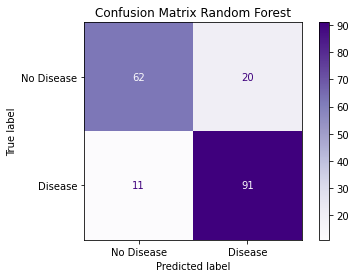

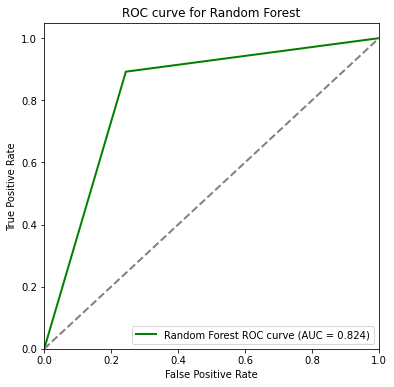

In [813]:
# Prediction on holdout test set
best_model_Random_forest = grid_random_forest.best_estimator_
y_predRandomForest = best_model_Random_forest.predict(X_test)

# class report
classReport(y_test, y_predRandomForest)

# Visualize the confusion matrix
conf_matrix(y_test, y_predRandomForest, "Confusion Matrix Random Forest")

# calculate false positive rate (fpr), true positive rate (tpr), and thresholds. It will return three arrays
fprRandomForest, tprRandomForest, thresholdsRandomForest = roc_curve(y_test, y_predRandomForest)

# calculate the area under the curve (AUC)
roc_aucRandomForest = auc(fprRandomForest, tprRandomForest)

# plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fprRandomForest, tprRandomForest, color="green", lw=2, label="Random Forest ROC curve (AUC = %0.3f)" % roc_aucRandomForest)
plt.plot([0, 1], [0, 1], color="grey", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for Random Forest")
plt.legend(loc="lower right")
plt.show()

# XGBoost

## GridSearchCV XGBoost

In [142]:
from xgboost import XGBClassifier


In [143]:
# Create classifier object
xgBoostSearch = XGBClassifier(random_state = 1)

# pipeline used to preprocess all the data, using the previusly defined preprocessing step, for scaling, OHE and imputation. Added is the specific classifier used to gain the results.
xgbPipeline = Pipeline([
    ("Preprocessing", preprocessing),
    ("Classifier", xgBoostSearch)
])

# Define the grid of hyperparameters to search
param_grid_XGB = {
    "Classifier__max_depth": [2,3,4,6],
    "Classifier__n_estimators": [50,100,150],
    "Classifier__learning_rate": [0.05, 0.1, 0.15],
    "Classifier__gamma": [0, 0.1, 0.2]
};

# Create a grid search object
grid_XGB =  GridSearchCV(xgbPipeline, param_grid_XGB, cv=skf10, scoring = scoring, return_train_score=True, refit = "sensitivity")

# Fit the grid search object to the data
grid_XGB.fit(X_train, y_train) # Fit the classifier to the data

print("Best hyperparameters: ", grid_XGB.best_params_)
print("Best score: ", grid_XGB.best_score_)



Best hyperparameters:  {'Classifier__gamma': 0, 'Classifier__learning_rate': 0.05, 'Classifier__max_depth': 6, 'Classifier__n_estimators': 50}
Best score:  0.8426829268292684


In [148]:
# Retrieve results

## Save the results into variables
# Test Set Performance Metrics
XGBf1Test = round(grid_XGB.cv_results_['mean_test_f1_weighted'][grid_XGB.best_index_] * 100, 2)
XGBSensitivityTest = round(grid_XGB.cv_results_['mean_test_sensitivity'][grid_XGB.best_index_] * 100, 2)
XGBSpecificityTest = round(grid_XGB.cv_results_['mean_test_specificity'][grid_XGB.best_index_] * 100, 2)
XGBAccuracyTest = round(grid_XGB.cv_results_['mean_test_accuracy'][grid_XGB.best_index_] * 100, 2)

# Std
XGBf1Test_std = round(grid_XGB.cv_results_['std_test_f1_weighted'][grid_XGB.best_index_], 4)
XGBSensitivityTest_std = round(grid_XGB.cv_results_['std_test_sensitivity'][grid_XGB.best_index_], 4)
XGBSpecificityTest_std = round(grid_XGB.cv_results_['std_test_specificity'][grid_XGB.best_index_], 4)
XGBAccuracyTest_std = round(grid_XGB.cv_results_['std_test_accuracy'][grid_XGB.best_index_], 4)

# Training Set Performance Metrics
XGBf1Train = round(grid_XGB.cv_results_['mean_train_f1_weighted'][grid_XGB.best_index_] * 100, 2)
XGBSensitivityTrain = round(grid_XGB.cv_results_['mean_train_sensitivity'][grid_XGB.best_index_] * 100, 2)
XGBSpecificityTrain = round(grid_XGB.cv_results_['mean_train_specificity'][grid_XGB.best_index_] * 100, 2)
XGBAccuracyTrain = round(grid_XGB.cv_results_['mean_train_accuracy'][grid_XGB.best_index_] * 100, 2)

# Std
XGBf1Train_std = round(grid_XGB.cv_results_['std_train_f1_weighted'][grid_XGB.best_index_], 4)
XGBSensitivityTrain_std = round(grid_XGB.cv_results_['std_train_sensitivity'][grid_XGB.best_index_], 4)
XGBSpecificityTrain_std = round(grid_XGB.cv_results_['std_train_specificity'][grid_XGB.best_index_], 4)
XGBAccuracyTrain_std = round(grid_XGB.cv_results_['std_train_accuracy'][grid_XGB.best_index_], 4)

# Show results
print("Test/Validation Set Performance Metrics XGBoost:")
print(f"F1-score (WA): {XGBf1Test}%")
print(f"Sensitivity: {XGBSensitivityTest}%")
print(f"Specificity: {XGBSpecificityTest}%")
print(f"Accuracy: {XGBAccuracyTest}%")
print()
print(f"F1-score (WA) STD: {XGBf1Test_std}")
print(f"Sensitivity STD: {XGBSensitivityTest_std}")
print(f"Specificity STD: {XGBSpecificityTest_std}")
print(f"Accuracy STD: {XGBAccuracyTest_std}")

print("\nTraining Set Performance Metrics XGBoost:")
print(f"F1-score (WA): {XGBf1Train}%")
print(f"Sensitivity: {XGBSensitivityTrain}%")
print(f"Specificity: {XGBSpecificityTrain}%")
print(f"Accuracy: {XGBAccuracyTrain}%")
print()
print(f"F1-score (WA) STD: {XGBf1Train_std}")
print(f"Sensitivity STD: {XGBSensitivityTrain_std}")
print(f"Specificity STD: {XGBSpecificityTrain_std}")
print(f"Accuracy STD: {XGBAccuracyTrain_std}")


Test/Validation Set Performance Metrics XGBoost:
F1-score (WA): 79.61%
Sensitivity: 84.27%
Specificity: 74.16%
Accuracy: 79.76%

F1-score (WA) STD: 0.0506
Sensitivity STD: 0.0551
Specificity STD: 0.0883
Accuracy STD: 0.0495

Training Set Performance Metrics XGBoost:
F1-score (WA): 92.66%
Sensitivity: 95.03%
Specificity: 89.77%
Accuracy: 92.68%

F1-score (WA) STD: 0.008
Sensitivity STD: 0.0097
Specificity STD: 0.0103
Accuracy STD: 0.008


              precision    recall  f1-score   support

           0     0.8026    0.7439    0.7722        82
           1     0.8056    0.8529    0.8286       102

    accuracy                         0.8043       184
   macro avg     0.8041    0.7984    0.8004       184
weighted avg     0.8043    0.8043    0.8034       184



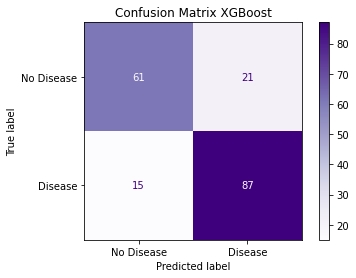

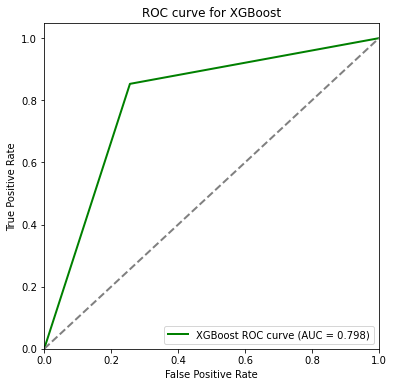

In [814]:
# Prediction on holdout test set
best_model_XGBoost = grid_XGB.best_estimator_
y_predXGBoost = best_model_XGBoost.predict(X_test)

# class report
classReport(y_test, y_predXGBoost)

# Visualize the confusion matrix
conf_matrix(y_test, y_predXGBoost, "Confusion Matrix XGBoost")

# calculate false positive rate (fpr), true positive rate (tpr), and thresholds. It will return three arrays
fprXGBoost, tprXGBoost, thresholdsXGBoost = roc_curve(y_test, y_predXGBoost)

# calculate the area under the curve (AUC)
roc_aucXGBoost = auc(fprXGBoost, tprXGBoost)

# plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fprXGBoost, tprXGBoost, color="green", lw=2, label="XGBoost ROC curve (AUC = %0.3f)" % roc_aucXGBoost)
plt.plot([0, 1], [0, 1], color="grey", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for XGBoost")
plt.legend(loc="lower right")
plt.show()

# Staking Classifier

In [195]:
from sklearn.ensemble import GradientBoostingClassifier


In [534]:
print(knn_grid.best_params_)
print(logReg_grid.best_params_)
print(grid_DecTree.best_params_)
print(grid_random_forest.best_params_)
print(grid_XGB.best_params_)

{'Classifier__n_neighbors': 13}
{'Classifier__C': 0.5, 'Classifier__max_iter': 50, 'Classifier__penalty': 'l2', 'Classifier__solver': 'liblinear'}
{'Classifier__ccp_alpha': 0.0, 'Classifier__max_depth': 8, 'Classifier__max_features': 'sqrt', 'Classifier__max_leaf_nodes': 30, 'Classifier__min_samples_leaf': 6, 'Classifier__min_samples_split': 4}
{'Classifier__ccp_alpha': 0.0, 'Classifier__max_depth': 8, 'Classifier__max_leaf_nodes': 20, 'Classifier__min_samples_leaf': 4, 'Classifier__min_samples_split': 2, 'Classifier__n_estimators': 200}
{'Classifier__gamma': 0, 'Classifier__learning_rate': 0.05, 'Classifier__max_depth': 6, 'Classifier__n_estimators': 50}


## Make new classifier objects with the best params found doing gridsearchCV

In [515]:
# kNN classifier with best parameters
knn_best_params = {
    "n_neighbors": 13
}
knn_clf = KNeighborsClassifier(**knn_best_params)



# Logistic Regression classifier with best parameters
logReg_best_params = {
    "C": 0.5,
    "max_iter": 50,
    "penalty": "l2",
    "solver": "liblinear"
}
logReg_clf = LogisticRegression(**logReg_best_params)

# Decision Tree classifier with best parameters
decTree_best_params = {
    "ccp_alpha": 0.0,
    "max_depth": 8,
    "max_features": "sqrt",
    "max_leaf_nodes": 30,
    "min_samples_leaf": 6,
    "min_samples_split": 4
}
decTree_clf = DecisionTreeClassifier(**decTree_best_params)

# XGBoost classifier with best parameters
xgb_best_params = {
    "gamma": 0,
    "learning_rate": 0.05,
    "max_depth": 6,
    "n_estimators": 50
}
xgb_clf = XGBClassifier(**xgb_best_params)

# Random Forest classifier with best parameters
rf_best_params = {
    "ccp_alpha": 0.0,
    "max_depth": 8,
    "max_leaf_nodes": 20,
    "min_samples_leaf": 4,
    "min_samples_split": 2,
    "n_estimators": 200
}
rf_clf = RandomForestClassifier(**rf_best_params)

In [516]:
from sklearn.ensemble import StackingClassifier
from sklearn.dummy import DummyClassifier

# The models used are the ones defined after GridSearchCV. They will be used as base models for my stackingClassifier
# All the base models
base_estimators = [("knn", knn_clf), ("LogReg", logReg_clf), 
                   ("DecTree", decTree_clf), ("RF", rf_clf), 
                   ("XGBoost", xgb_clf)]

base_estimators1 = [("knn", knn_clf), ("LogReg", logReg_clf), ("RF", rf_clf), ("XGBoost", xgb_clf)]            # Without DecisionTree
base_estimators2 = [("knn", knn_clf), ("DecTree", decTree_clf), ("RF", rf_clf), ("XGBoost", xgb_clf)]          # Without Logistic Regression
base_estimators3 = [("knn", knn_clf), ("LogReg", logReg_clf), ("DecTree", decTree_clf), ("XGBoost", xgb_clf)]  # Without Random Forest
base_estimators4 = [("LogReg", logReg_clf), ("DecTree", decTree_clf), ("RF", rf_clf), ("XGBoost", xgb_clf)]    # Without kNN 
base_estimators5 = [("knn", knn_clf), ("LogReg", logReg_clf), ("DecTree", decTree_clf), ("RF", rf_clf)]        # Without XGBoost 

final_estimator1 = logReg_clf
final_estimator2 = rf_clf
final_estimator3 = xgb_clf
final_estimator4 = knn_clf
final_estimator5 = decTree_clf




# Stacking Classifier, using logistic regression as the final estimator 
StackClf = StackingClassifier(stack_method = "auto", estimators = base_estimators2, final_estimator= final_estimator1, cv= skf10)

# Setting up the StackingClassifier in a pipeline, so that I can used it with the preprocessing steps.
StackingPipeline = Pipeline([
    ("Preprocessing", preprocessing),
    ("Classifier", StackClf)
])


# Gaining the results from the StackingClassifier by doing cross_validate
resultsStacking = cross_validate(StackingPipeline, X_train, y_train, cv=skf10, scoring=scoring, return_train_score=True)



In [517]:
# Retrieve results

############ Test
## Save the results into variables
# Mean Performance
Stackf1Test = round(resultsStacking['test_f1_weighted'].mean()*100, 2)
StackSensitivityTest = round(resultsStacking['test_sensitivity'].mean()*100, 2)
StackSpecificityTest = round(resultsStacking['test_specificity'].mean()*100, 2)
StackAccuracyTest = round(resultsStacking['test_accuracy'].mean()*100, 2)

# Std
Stackf1Test_std = round(resultsStacking['test_f1_weighted'].std(), 4)
StackSensitivityTest_std = round(resultsStacking['test_sensitivity'].std(), 4)
StackSpecificityTest_std = round(resultsStacking['test_specificity'].std(), 4)
StackAccuracyTest_std = round(resultsStacking['test_accuracy'].std(), 4)


# Show results
print("Test/Validation Set Performance Metrics Stacking Classifier:")
print(f"F1-score (WA): {Stackf1Test}%")
print(f"Sensitivity: {StackSensitivityTest}%")
print(f"Specificity: {StackSpecificityTest}%")
print(f"Accuracy: {StackAccuracyTest}%")
print()
print(f"F1-score (WA) STD: {Stackf1Test_std}")
print(f"Sensitivity STD: {StackSensitivityTest_std}")
print(f"Specificity STD: {StackSpecificityTest_std}")
print(f"Accuracy STD: {StackAccuracyTest_std}")


############ Train
## Save the results into variables
# Mean Performance
Stackf1Train = round(resultsStacking['train_f1_weighted'].mean()*100, 2)
StackSensitivityTrain = round(resultsStacking['train_sensitivity'].mean()*100, 2)
StackSpecificityTrain = round(resultsStacking['train_specificity'].mean()*100, 2)
StackAccuracyTrain = round(resultsStacking['train_accuracy'].mean()*100, 2)

# Std
Stackf1Train_std = round(resultsStacking['train_f1_weighted'].std(), 4)
StackSensitivityTrain_std = round(resultsStacking['train_sensitivity'].std(), 4)
StackSpecificityTrain_std = round(resultsStacking['train_specificity'].std(), 4)
StackAccuracyTrain_std = round(resultsStacking['train_accuracy'].std(), 4)

# Show results 
print("\nTraining Set Performance Metrics Stacking Classifier:")
print(f"F1-score (WA): {Stackf1Train}%")
print(f"Sensitivity: {StackSensitivityTrain}%")
print(f"Specificity: {StackSpecificityTrain}%")
print(f"Accuracy: {StackAccuracyTrain}%")
print()
print(f"F1-score (WA) STD: {Stackf1Train_std}")
print(f"Sensitivity STD: {StackSensitivityTrain_std}")
print(f"Specificity STD: {StackSpecificityTrain_std}")
print(f"Accuracy STD: {StackAccuracyTrain_std}")

Test/Validation Set Performance Metrics Stacking Classifier:
F1-score (WA): 79.62%
Sensitivity: 85.02%
Specificity: 73.23%
Accuracy: 79.76%

F1-score (WA) STD: 0.06
Sensitivity STD: 0.0515
Specificity STD: 0.082
Accuracy STD: 0.0596

Training Set Performance Metrics Stacking Classifier:
F1-score (WA): 86.13%
Sensitivity: 91.78%
Specificity: 79.36%
Accuracy: 86.23%

F1-score (WA) STD: 0.0055
Sensitivity STD: 0.0055
Specificity STD: 0.0078
Accuracy STD: 0.0055


              precision    recall  f1-score   support

           0      0.863     0.768     0.813        82
           1      0.829     0.902     0.864       102

    accuracy                          0.842       184
   macro avg      0.846     0.835     0.838       184
weighted avg      0.844     0.842     0.841       184



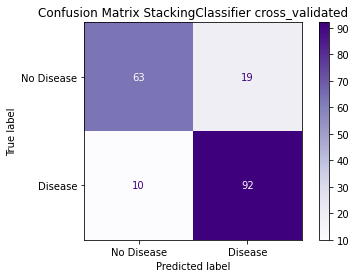

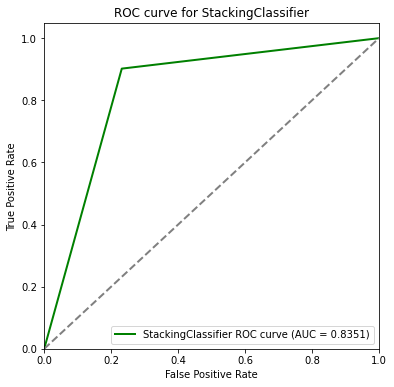

In [518]:
# Fit the stacking classifier on the training data
StackingPipeline.fit(X_train, y_train)

# Generate predictions on the test data
y_predStack = StackingPipeline.predict(X_test)


# class report
classReport(y_test, y_predStack)

# Visualize the confusion matrix
conf_matrix(y_test, y_predStack, "Confusion Matrix StackingClassifier")

# calculate false positive rate (fpr), true positive rate (tpr), and thresholds. It will return three arrays
fprStack, tprStack, thresholdsStack = roc_curve(y_test, y_predStack)

# calculate the area under the curve (AUC)
roc_aucStack = auc(fprStack, tprStack)

# plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fprStack, tprStack, color="green", lw=2, label="StackingClassifier ROC curve (AUC = %0.4f)" % roc_aucStack)
plt.plot([0, 1], [0, 1], color="grey", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for StackingClassifier")
plt.legend(loc="lower right")
plt.show()



# Results

              precision    recall  f1-score   support

           0     0.8630    0.7683    0.8129        82
           1     0.8288    0.9020    0.8638       102

    accuracy                         0.8424       184
   macro avg     0.8459    0.8351    0.8384       184
weighted avg     0.8441    0.8424    0.8411       184



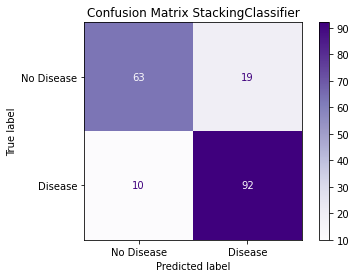

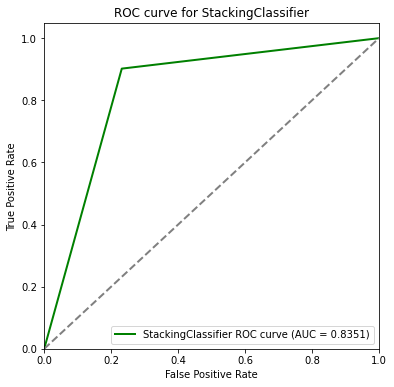

In [815]:
# class report
classReport(y_test, y_predStack)

# Visualize the confusion matrix
conf_matrix(y_test, y_predStack, "Confusion Matrix StackingClassifier")

# calculate false positive rate (fpr), true positive rate (tpr), and thresholds. It will return three arrays
fprStack, tprStack, thresholdsStack = roc_curve(y_test, y_predStack)

# calculate the area under the curve (AUC)
roc_aucStack = auc(fprStack, tprStack)

# plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fprStack, tprStack, color="green", lw=2, label="StackingClassifier ROC curve (AUC = %0.4f)" % roc_aucStack)
plt.plot([0, 1], [0, 1], color="grey", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for StackingClassifier")
plt.legend(loc="lower right")
plt.show()

In [519]:
model_PerformanceTest = pd.DataFrame({
    "Model (Test)": ["K-Nearest Neighbour", "Logistic Regression", "Decision Tree", "Random Forest", "XGBoost", "Stacking Classifier"], 
    "Sensitivity": [kNNSensitivityTest, logRegSensitivityTest,treeSensitivityTest,RFSensitivityTest, XGBSensitivityTest, StackSensitivityTest], 
    "Specificity": [kNNSpecificityTest, logRegSpecificityTest,treeSpecificityTest,RFSpecificityTest, XGBSpecificityTest, StackSpecificityTest], 
    "F1-score": [kNNf1Test,logRegf1Test,treef1Test,RFf1Test, XGBf1Test, Stackf1Test],
    "Accuracy": [kNNAccuracyTest,logRegAccuracyTest,treeAccuracyTest,RFAccuracyTest, XGBAccuracyTest, StackAccuracyTest]})


In [520]:
model_PerformanceTest_std = pd.DataFrame({
    "Model (Test)": ["K-Nearest Neighbour", "Logistic Regression", "Decision Tree", "Random Forest", "XGBoost", "Stacking Classifier"],
    "Sensitivity_std": [kNNSensitivityTest_std, logRegSensitivityTest_std, treeSensitivityTest_std, RFSensitivityTest_std, XGBSensitivityTest_std, StackSensitivityTest_std],
    "Specificity_std": [kNNSpecificityTest_std, logRegSpecificityTest_std, treeSpecificityTest_std, RFSpecificityTest_std, XGBSpecificityTest_std, StackSpecificityTest_std],
    "F1-score_std": [kNNf1Test_std, logRegf1Test_std, treef1Test_std, RFf1Test_std, XGBf1Test_std, Stackf1Test_std],
    "Accuracy_std": [kNNAccuracyTest_std, logRegAccuracyTest_std, treeAccuracyTest_std, RFAccuracyTest_std, XGBAccuracyTest_std, StackAccuracyTest_std]
})

In [521]:
model_PerformanceTrain = pd.DataFrame({
    "Model (Train)": ["K-Nearest Neighbour", "Logistic Regression", "Decision Tree", "Random Forest", "XGBoost", "Stacking Classifier"], 
    "Sensitivity": [kNNSensitivityTrain, logRegSensitivityTrain, treeSensitivityTrain, RFSensitivityTrain, XGBSensitivityTrain, StackSensitivityTrain], 
    "Specificity": [kNNSpecificityTrain, logRegSpecificityTrain, treeSpecificityTrain, RFSpecificityTrain, XGBSpecificityTrain, StackSpecificityTrain], 
    "F1-score": [kNNf1Train, logRegf1Train, treef1Train, RFf1Train, XGBf1Train, Stackf1Train],
    "Accuracy": [kNNAccuracyTrain, logRegAccuracyTrain, treeAccuracyTrain, RFAccuracyTrain, XGBAccuracyTrain, StackAccuracyTrain]
})


In [522]:
model_PerformanceTrain_std = pd.DataFrame({
    "Model (Train)": ["K-Nearest Neighbour", "Logistic Regression", "Decision Tree", "Random Forest", "XGBoost", "Stacking Classifier"],
    "Sensitivity_std": [kNNSensitivityTrain_std, logRegSensitivityTrain_std, treeSensitivityTrain_std, RFSensitivityTrain_std, XGBSensitivityTrain_std, StackSensitivityTrain_std],
    "Specificity_std": [kNNSpecificityTrain_std, logRegSpecificityTrain_std, treeSpecificityTrain_std, RFSpecificityTrain_std, XGBSpecificityTrain_std, StackSpecificityTrain_std],
    "F1-score_std": [kNNf1Train_std, logRegf1Train_std, treef1Train_std, RFf1Train_std, XGBf1Train_std, Stackf1Train_std],
    "Accuracy_std": [kNNAccuracyTrain_std, logRegAccuracyTrain_std, treeAccuracyTrain_std, RFAccuracyTrain_std, XGBAccuracyTrain_std, StackAccuracyTrain_std]
})

In [523]:
model_PerformanceTest

,Model (Test),Sensitivity,Specificity,F1-score,Accuracy
0,K-Nearest Neighbour,84.76,70.80,78.35,78.53
1,Logistic Regression,81.84,74.44,78.48,78.54
2,Decision Tree,81.80,69.91,76.19,76.50
3,Random Forest,85.50,75.38,80.89,80.97
4,XGBoost,84.27,74.16,79.61,79.76
5,Stacking Classifier,85.02,73.23,79.62,79.76


In [524]:
model_PerformanceTest_std

,Model (Test),Sensitivity_std,Specificity_std,F1-score_std,Accuracy_std
0,K-Nearest Neighbour,0.0502,0.0757,0.0562,0.0556
1,Logistic Regression,0.0681,0.0756,0.0628,0.0628
2,Decision Tree,0.0806,0.1122,0.0525,0.0507
3,Random Forest,0.0427,0.0402,0.0394,0.0395
4,XGBoost,0.0551,0.0883,0.0506,0.0495
5,Stacking Classifier,0.0515,0.0820,0.0600,0.0596


In [535]:
model_PerformanceTestAll = pd.DataFrame({
    "Model (Test)": ["K-Nearest Neighbour", "Logistic Regression", "Decision Tree", "Random Forest", "XGBoost", "Stacking Classifier"],
    "Sensitivity": [kNNSensitivityTest, logRegSensitivityTest, treeSensitivityTest, RFSensitivityTest, XGBSensitivityTest, StackSensitivityTest],
    "Sensitivity_std": [kNNSensitivityTest_std, logRegSensitivityTest_std, treeSensitivityTest_std, RFSensitivityTest_std, XGBSensitivityTest_std, StackSensitivityTest_std],
    "Specificity": [kNNSpecificityTest, logRegSpecificityTest, treeSpecificityTest, RFSpecificityTest, XGBSpecificityTest, StackSpecificityTest],
    "Specificity_std": [kNNSpecificityTest_std, logRegSpecificityTest_std, treeSpecificityTest_std, RFSpecificityTest_std, XGBSpecificityTest_std, StackSpecificityTest_std],
    "F1-score": [kNNf1Test, logRegf1Test, treef1Test, RFf1Test, XGBf1Test, Stackf1Test],
    "F1-score_std": [kNNf1Test_std, logRegf1Test_std, treef1Test_std, RFf1Test_std, XGBf1Test_std, Stackf1Test_std],
    "Accuracy": [kNNAccuracyTest, logRegAccuracyTest, treeAccuracyTest, RFAccuracyTest, XGBAccuracyTest, StackAccuracyTest],
    "Accuracy_std": [kNNAccuracyTest_std, logRegAccuracyTest_std, treeAccuracyTest_std, RFAccuracyTest_std, XGBAccuracyTest_std, StackAccuracyTest_std]
})

In [536]:
model_PerformanceTestAll

,Model (Test),Sensitivity,Sensitivity_std,Specificity,Specificity_std,F1-score,F1-score_std,Accuracy,Accuracy_std
0,K-Nearest Neighbour,84.76,0.0502,70.80,0.0757,78.35,0.0562,78.53,0.0556
1,Logistic Regression,81.84,0.0681,74.44,0.0756,78.48,0.0628,78.54,0.0628
2,Decision Tree,81.80,0.0806,69.91,0.1122,76.19,0.0525,76.50,0.0507
3,Random Forest,85.50,0.0427,75.38,0.0402,80.89,0.0394,80.97,0.0395
4,XGBoost,84.27,0.0551,74.16,0.0883,79.61,0.0506,79.76,0.0495
5,Stacking Classifier,85.02,0.0515,73.23,0.0820,79.62,0.0600,79.76,0.0596


In [537]:
model_PerformanceTrain

,Model (Train),Sensitivity,Specificity,F1-score,Accuracy
0,K-Nearest Neighbour,88.04,75.21,82.18,82.31
1,Logistic Regression,83.35,75.28,79.69,79.74
2,Decision Tree,84.55,76.49,80.85,80.95
3,Random Forest,90.91,80.09,85.99,86.07
4,XGBoost,95.03,89.77,92.66,92.68
5,Stacking Classifier,91.78,79.36,86.13,86.23


In [539]:
model_PerformanceTrain_std

,Model (Train),Sensitivity_std,Specificity_std,F1-score_std,Accuracy_std
0,K-Nearest Neighbour,0.0085,0.0174,0.0075,0.0072
1,Logistic Regression,0.0074,0.0103,0.0077,0.0076
2,Decision Tree,0.0367,0.0587,0.0163,0.0154
3,Random Forest,0.0130,0.0099,0.0085,0.0086
4,XGBoost,0.0097,0.0103,0.0080,0.0080
5,Stacking Classifier,0.0055,0.0078,0.0055,0.0055


In [529]:
model_PerformanceTrainAll = pd.DataFrame({
    "Model (Train)": ["K-Nearest Neighbour", "Logistic Regression", "Decision Tree", "Random Forest", "XGBoost", "Stacking Classifier"],
    "Sensitivity": [kNNSensitivityTrain, logRegSensitivityTrain, treeSensitivityTrain, RFSensitivityTrain, XGBSensitivityTrain, StackSensitivityTrain],
    "Sensitivity_std": [kNNSensitivityTrain_std, logRegSensitivityTrain_std, treeSensitivityTrain_std, RFSensitivityTrain_std, XGBSensitivityTrain_std, StackSensitivityTrain_std],
    "Specificity": [kNNSpecificityTrain, logRegSpecificityTrain, treeSpecificityTrain, RFSpecificityTrain, XGBSpecificityTrain, StackSpecificityTrain],
    "Specificity_std": [kNNSpecificityTrain_std, logRegSpecificityTrain_std, treeSpecificityTrain_std, RFSpecificityTrain_std, XGBSpecificityTrain_std, StackSpecificityTrain_std],
    "F1-score": [kNNf1Train, logRegf1Train, treef1Train, RFf1Train, XGBf1Train, Stackf1Train],
    "F1-score_std": [kNNf1Train_std, logRegf1Train_std, treef1Train_std, RFf1Train_std, XGBf1Train_std, Stackf1Train_std],
    "Accuracy": [kNNAccuracyTrain, logRegAccuracyTrain, treeAccuracyTrain, RFAccuracyTrain, XGBAccuracyTrain, StackAccuracyTrain],
    "Accuracy_std": [kNNAccuracyTrain_std, logRegAccuracyTrain_std, treeAccuracyTrain_std, RFAccuracyTrain_std, XGBAccuracyTrain_std, StackAccuracyTrain_std]
})

In [530]:
model_PerformanceTrainAll

,Model (Train),Sensitivity,Sensitivity_std,Specificity,Specificity_std,F1-score,F1-score_std,Accuracy,Accuracy_std
0,K-Nearest Neighbour,88.04,0.0085,75.21,0.0174,82.18,0.0075,82.31,0.0072
1,Logistic Regression,83.35,0.0074,75.28,0.0103,79.69,0.0077,79.74,0.0076
2,Decision Tree,84.55,0.0367,76.49,0.0587,80.85,0.0163,80.95,0.0154
3,Random Forest,90.91,0.0130,80.09,0.0099,85.99,0.0085,86.07,0.0086
4,XGBoost,95.03,0.0097,89.77,0.0103,92.66,0.0080,92.68,0.0080
5,Stacking Classifier,91.78,0.0055,79.36,0.0078,86.13,0.0055,86.23,0.0055


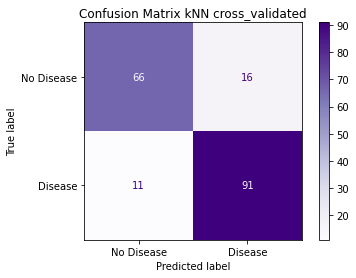

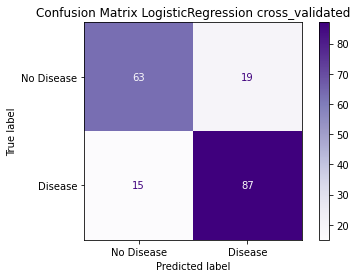

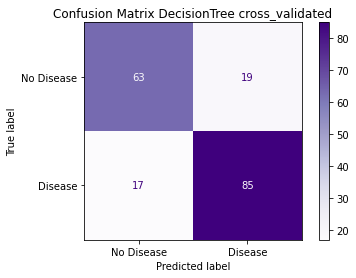

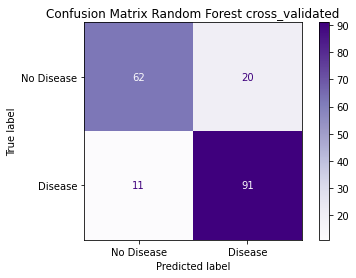

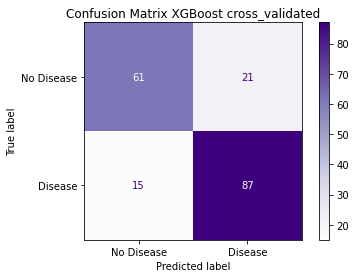

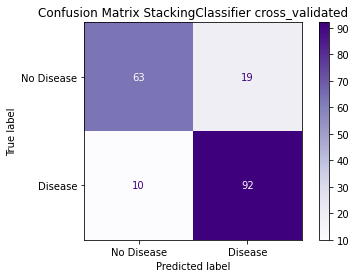

In [531]:
conf_matrix(y_test, y_predkNNgs, "Confusion Matrix kNN cross_validated")
conf_matrix(y_test, y_predLogReg, "Confusion Matrix LogisticRegression cross_validated")
conf_matrix(y_test, y_predDecTree, "Confusion Matrix DecisionTree cross_validated")
conf_matrix(y_test, y_predRandomForest, "Confusion Matrix Random Forest cross_validated")
conf_matrix(y_test, y_predXGBoost, "Confusion Matrix XGBoost cross_validated")
conf_matrix(y_test, y_predStack, "Confusion Matrix StackingClassifier cross_validated")

### Combined ROC/AUC

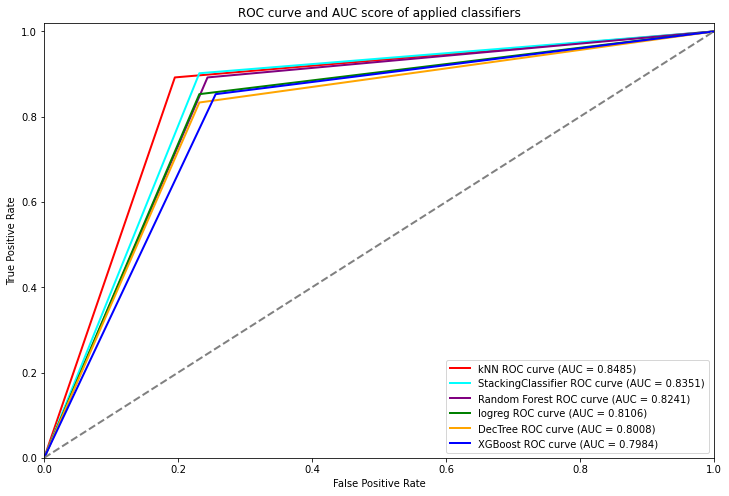

In [615]:
plt.figure(figsize=(12,8))

plt.plot(fprkNN, tprkNN, color="red", lw=2, label="kNN ROC curve (AUC = %0.4f)" % roc_auckNN)
plt.plot(fprStack, tprStack, color="cyan", lw=2, label="StackingClassifier ROC curve (AUC = %0.4f)" % roc_aucStack)
plt.plot(fprRandomForest, tprRandomForest, color="purple", lw=2, label="Random Forest ROC curve (AUC = %0.4f)" % roc_aucRandomForest)
plt.plot(fprlogreg, tprlogreg, color="green", lw=2, label="logreg ROC curve (AUC = %0.4f)" % roc_auclogreg)
plt.plot(fprDecTree, tprDecTree, color="orange", lw=2, label="DecTree ROC curve (AUC = %0.4f)" % roc_aucDecTree)
plt.plot(fprXGBoost, tprXGBoost, color="blue", lw=2, label="XGBoost ROC curve (AUC = %0.4f)" % roc_aucXGBoost)



plt.plot([0, 1], [0, 1], color="grey", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.02])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve and AUC score of applied classifiers")
plt.legend(loc="lower right")

plt.savefig("roc_curve_25_05.png", dpi=300, bbox_inches='tight')
plt.show()

## SHAP

In [236]:
import shap
shap.initjs()

In [241]:
#final_estimator
#preprocessing
#pipeline
#feature_names
#processedXtrain

In [249]:
# Using this raises errors, dont have the time atm to clear it up...

# Making explainer object
#explainerShapPredictStack = shap.Explainer(StackingPipeline.predict, X_train, feature_names = feature_names)
# Compute the SHAP values for the test set
#shap_valuesPredictStack = explainerShapPredictStack(X_test)


In [ ]:
# Stacking Classifier, using logistic regression as the final estimator 
StackClfShap = StackingClassifier(estimators = base_estimators2, final_estimator= final_estimator1, cv= skf10)

StackClfShap.fit(processedXtrain, y_train)

In [632]:

# Making explainer object
explainerShapPredict = shap.Explainer(StackClfShap.predict, processedXtrain, feature_names = feature_names)
# Compute the SHAP values for the test set
shap_valuesPredict = explainerShapPredict(processedXtest)



# Convert the preprocessed data into pandas dataframe
df_test = pd.DataFrame(data=processedXtest, columns=feature_names)


Permutation explainer: 185it [08:59,  2.98s/it]                         


In [270]:
# Making this with KernelExplainer, to get the possibility to make Force Plot with extected values.
background = shap.maskers.Independent(processedXtrain, max_samples=100)
explainerShapPredictKernel = shap.KernelExplainer(StackClfShap.predict, background.data, feature_names=feature_names)
shap_valuesPredictKernel = explainerShapPredictKernel.shap_values(processedXtest)


  0%|          | 0/184 [00:00<?, ?it/s]

In [633]:
# Convert feature_names to an array of integer scalar values
#feature_names_arr = np.array(feature_names)

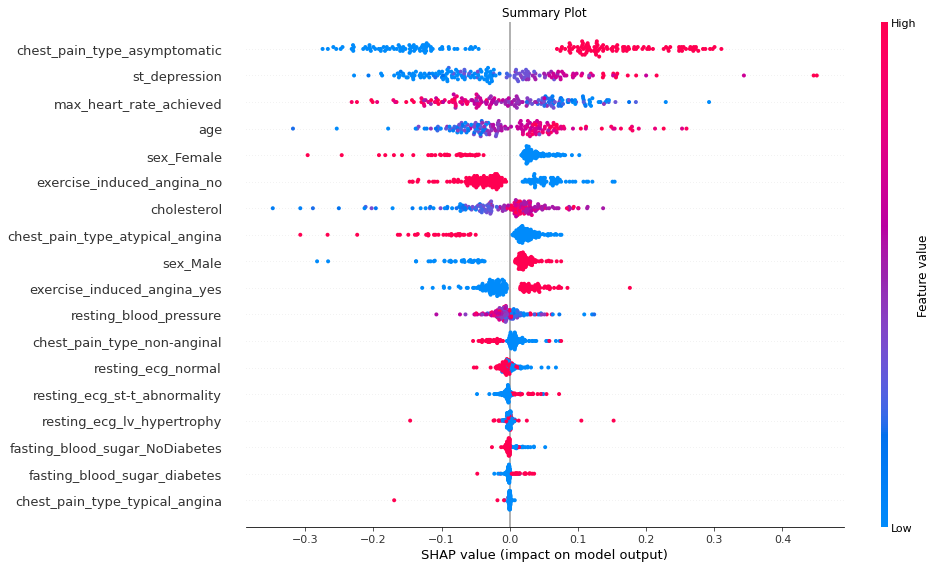

<Figure size 432x288 with 0 Axes>

In [634]:
shap.initjs()
# Summary plot
plt.title("Summary Plot")
shap.summary_plot(shap_valuesPredict, df_test, feature_names=feature_names, plot_type = "dot", plot_size = (14,8))
# Order colors: color=plt.get_cmap("cool")


plt.savefig("SHAP_summary_plot.png", bbox_inches='tight')


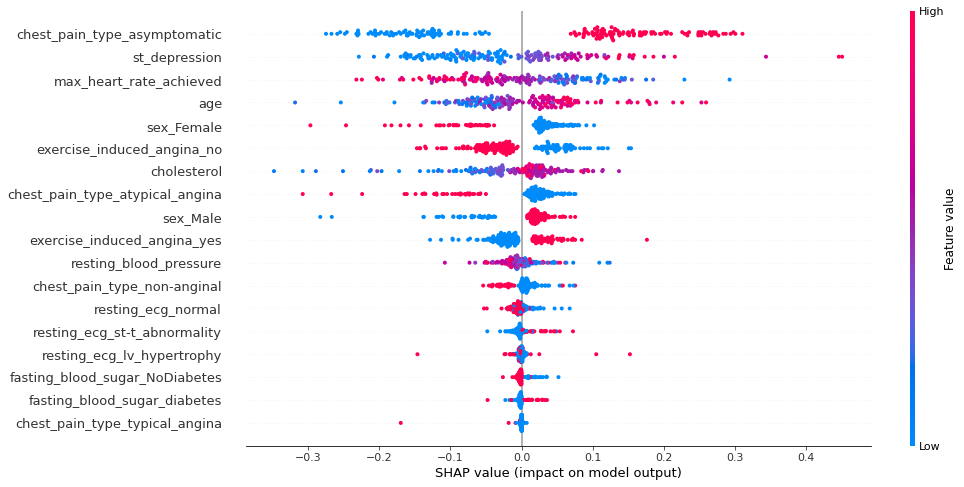

In [647]:
shap.plots.beeswarm(shap_valuesPredict, order=shap_valuesPredict.abs.mean(0), max_display = None,plot_size = (14,8))

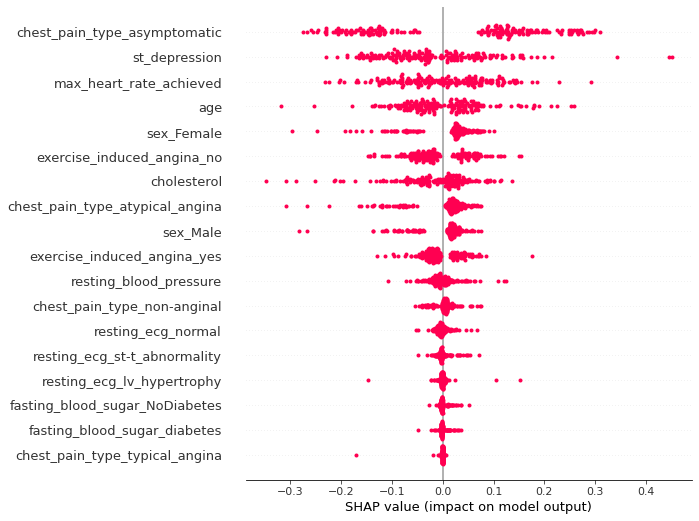

In [653]:
#shap.plots.beeswarm(shap_valuesPredict, color="shap_red", max_display = None)
#plt.savefig("SHAP_beeswarm_abs.png", bbox_inches='tight')

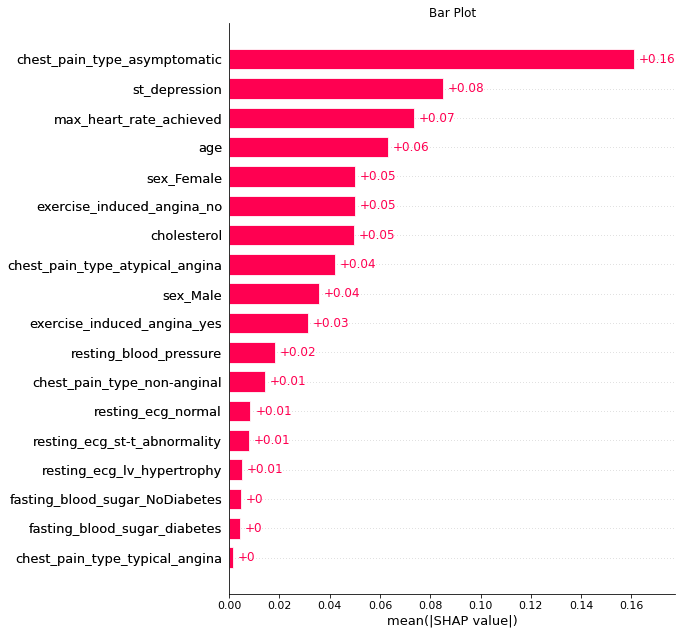

<Figure size 432x288 with 0 Axes>

In [637]:
plt.title("Bar Plot")
shap.plots.bar(shap_valuesPredict.abs.mean(0), max_display=None)

plt.savefig("SHAP_bar_plot.png", bbox_inches='tight')

In [638]:
print(len(feature_names))
print(df_test.shape[1])


18
18


In [639]:
df_test.head(5)

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,sex_Female,sex_Male,chest_pain_type_asymptomatic,chest_pain_type_atypical_angina,chest_pain_type_non-anginal,chest_pain_type_typical_angina,resting_ecg_lv_hypertrophy,resting_ecg_normal,resting_ecg_st-t_abnormality,fasting_blood_sugar_NoDiabetes,fasting_blood_sugar_diabetes,exercise_induced_angina_no,exercise_induced_angina_yes
0,0.472217,0.970370,-0.559838,-0.770511,-0.850927,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.365146,0.417957,-1.070472,0.440383,-0.471755,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-1.669199,-0.686868,0.631639,1.328372,-0.850927,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.598491,-1.460245,0.272305,-1.093416,-0.850927,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,-1.347987,0.970370,-1.467631,-0.366879,0.570970,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [640]:
StackClfShap.predict(df_test.iloc[0:5,:])

X has feature names, but KNeighborsClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but RandomForestClassifier was fitted without feature names


array([1, 0, 1, 1, 1])

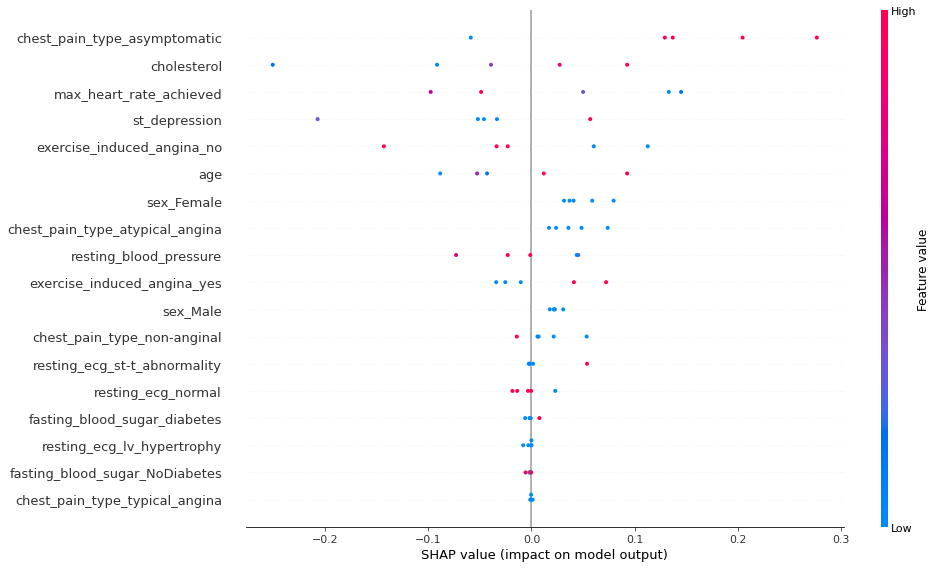

In [641]:
shap.summary_plot(shap_valuesPredict[0:5], df_test.iloc[0:5,:], 
                  feature_names=feature_names, plot_type = "dot", plot_size = (14,8))

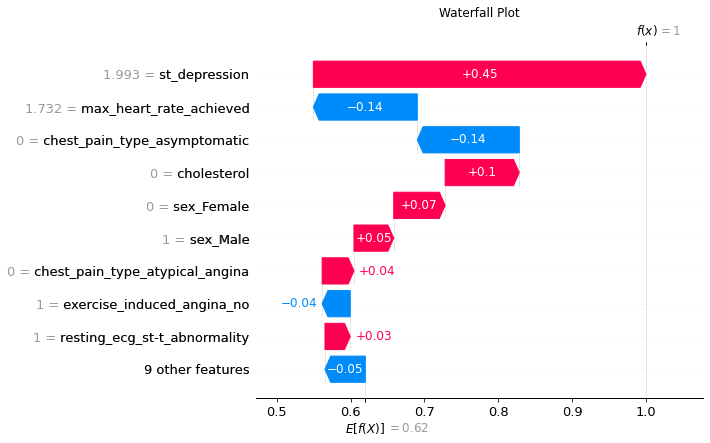

<Figure size 432x288 with 0 Axes>

In [642]:
#shap.initjs()
# waterfall plot
plt.title("Waterfall Plot")
shap.plots.waterfall(shap_valuesPredict[42])

plt.savefig("SHAP_waterfall_plot_Pred1.png", bbox_inches='tight')

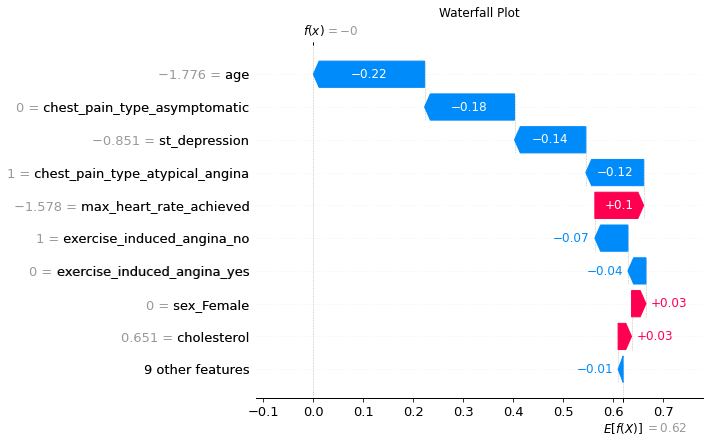

<Figure size 432x288 with 0 Axes>

In [593]:
#shap.initjs()
# waterfall plot
plt.title("Waterfall Plot")
shap.plots.waterfall(shap_valuesPredict[64])

plt.savefig("SHAP_waterfall_plot_Pred0.png", bbox_inches='tight')

In [610]:
shap.initjs()
# Gain expected values
expected_value = explainerShapPredictKernel.expected_value

# Force plot
#plt.title("Force Plot")
shap.force_plot(expected_value, shap_valuesPredictKernel[42], df_test.iloc[[42]])


In [611]:
shap.initjs()

# Gain expected values
expected_value = explainerShapPredictKernel.expected_value

# Force plot 
shap.force_plot(expected_value, shap_valuesPredictKernel[64], df_test.iloc[[64]])

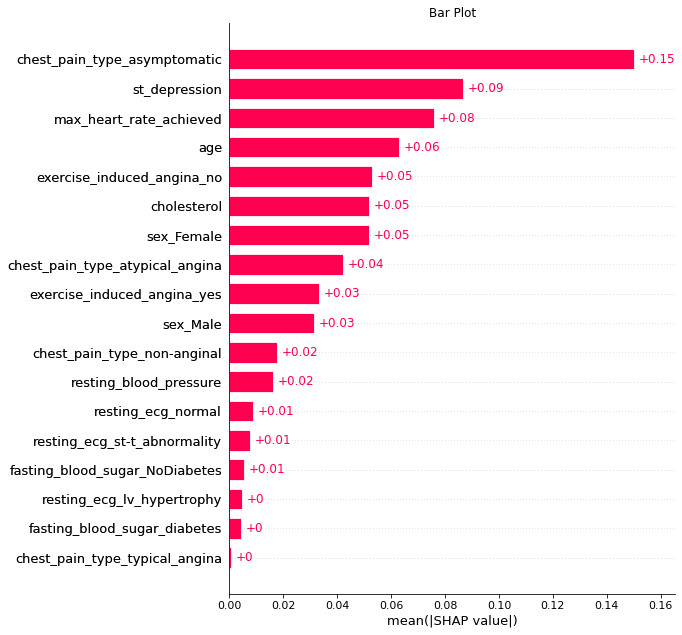

In [612]:
#Mean SHAP, highlight important features
plt.title("Bar Plot")
shap.plots.bar(shap_valuesPredict, max_display = None,order=shap_valuesPredict.abs.mean(0))

## Combining the SHAP values for categorical features back together

In [ ]:
# Making explainer object
#explainerShapPredictNoProcess = shap.Explainer(StackClfShap.predict, X_train, feature_names = feature_names)
# Compute the SHAP values for the test set
#shap_valuesPredictNoProcess = explainerShapPredict(processedXtest)

In [276]:
original_feature_names = features_num + features_cat
original_feature_names

['age',
 'resting_blood_pressure',
 'cholesterol',
 'max_heart_rate_achieved',
 'st_depression',
 'sex',
 'chest_pain_type',
 'resting_ecg',
 'fasting_blood_sugar',
 'exercise_induced_angina']

In [277]:
X_cat = data_temp.drop(columns=["age", "resting_blood_pressure", "cholesterol", "max_heart_rate_achieved", "st_depression", "target"])
X_cat
enc = OneHotEncoder()
enc.fit(X_cat)

#X_encoded = enc.fit_transform(X_cat).toarray()

OneHotEncoder()

In [278]:
print(feature_names)

['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression', 'sex_Female', 'sex_Male', 'chest_pain_type_asymptomatic', 'chest_pain_type_atypical_angina', 'chest_pain_type_non-anginal', 'chest_pain_type_typical_angina', 'resting_ecg_lv_hypertrophy', 'resting_ecg_normal', 'resting_ecg_st-t_abnormality', 'fasting_blood_sugar_NoDiabetes', 'fasting_blood_sugar_diabetes', 'exercise_induced_angina_no', 'exercise_induced_angina_yes']


In [279]:
print(features_cat)
print(features_num)

['sex', 'chest_pain_type', 'resting_ecg', 'fasting_blood_sugar', 'exercise_induced_angina']
['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression']


In [280]:
# Dividing the shap values into two variables for num and cat features
shap_values_num = shap_valuesPredict[:, :len(features_num)]
shap_values_cat = shap_valuesPredict[:, len(features_num):]

print(type(shap_values_num))
print(shap_values_num.shape)
print(type(shap_values_cat))
print(shap_values_cat.shape)

<class 'shap._explanation.Explanation'>
(184, 5)
<class 'shap._explanation.Explanation'>
(184, 13)


In [281]:
print(shap_values_num.feature_names)
print(shap_values_cat.feature_names)

['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression']
['sex_Female', 'sex_Male', 'chest_pain_type_asymptomatic', 'chest_pain_type_atypical_angina', 'chest_pain_type_non-anginal', 'chest_pain_type_typical_angina', 'resting_ecg_lv_hypertrophy', 'resting_ecg_normal', 'resting_ecg_st-t_abnormality', 'fasting_blood_sugar_NoDiabetes', 'fasting_blood_sugar_diabetes', 'exercise_induced_angina_no', 'exercise_induced_angina_yes']


In [282]:
# get number of unique categories for each categorical feature
n_categories = []
for feat in features_cat:
    n = np.sum([1 for name in feature_names if name.startswith(feat+'_')])
    n_categories.append(n)
n_categories

[2, 4, 3, 2, 2]

In [283]:
new_shap_values = []
for values in shap_values_cat.values:
    
    #split shap values into a list for each feature
    values_split = np.split(values , np.cumsum(n_categories)[:-1])
  
    #sum values within each list
    values_sum = [sum(l) for l in values_split]
    
    new_shap_values.append(values_sum)
    

In [284]:
#replace shap values
shap_values_cat.values = np.array(new_shap_values)

#replace data with categorical feature values 
new_data = np.array(X_cat)
shap_values_cat.data = np.array(new_data)

#update feature names
shap_values_cat.feature_names = list(X_cat.columns)

In [285]:
#shap_values_cat.data
#shap_values_num.data

In [286]:
print(type(shap_values_cat))
print(type(shap_values_num))

<class 'shap._explanation.Explanation'>
<class 'shap._explanation.Explanation'>


In [287]:
shap_values_combined = shap.Explanation(values=np.concatenate([shap_values_num.values, shap_values_cat.values], axis=1),
                                         data=shap_values_num.data, 
                                         feature_names=shap_values_num.feature_names + shap_values_cat.feature_names)


In [288]:
shap_values_combined.base_values = np.concatenate([shap_values_num.base_values, shap_values_cat.base_values])


In [289]:
shap_values_combined.base_values

array([0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62,
       0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62,
       0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62,
       0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62,
       0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62,
       0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62,
       0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62,
       0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62,
       0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62,
       0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62,
       0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62,
       0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62,
       0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62,
       0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.

In [290]:
print(type(shap_values_combined))
print(shap_values_combined.feature_names)
print(shap_values_combined.data[1])
print(shap_values_combined.base_values)

<class 'shap._explanation.Explanation'>
['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression', 'sex', 'chest_pain_type', 'fasting_blood_sugar', 'resting_ecg', 'exercise_induced_angina']
[ 0.3651464   0.41795742 -1.07047158  0.44038326 -0.47175459]
[0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62
 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62
 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62
 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62
 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62
 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62
 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62
 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62
 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62
 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62
 0.6

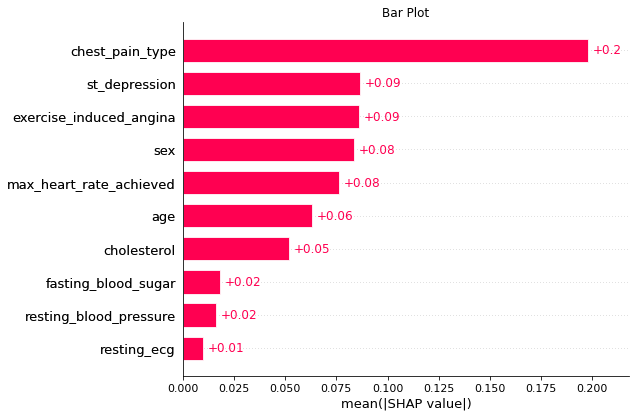

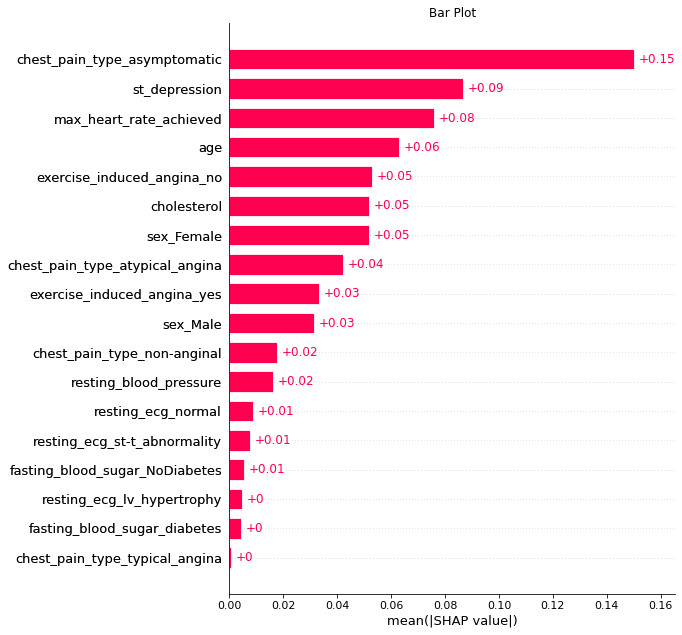

In [614]:
#Mean SHAP, highlight important features
plt.title("Bar Plot")
shap.plots.bar(shap_values_combined, max_display = None)
plt.title("Bar Plot")
#Mean SHAP, highlight important features
shap.plots.bar(shap_valuesPredict, max_display = None)

In [ ]:
# I cant seem to get this next part to work properly. 

IndexError: index 6 is out of bounds for axis 0 with size 5

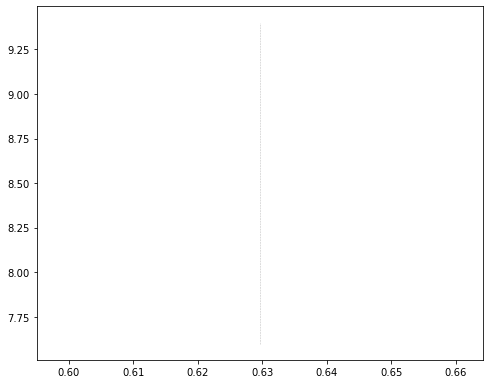

In [331]:
shap.initjs()
# waterfall plots
shap.plots.waterfall(shap_values_combined[2])

184


IndexError: index 6 is out of bounds for axis 0 with size 5

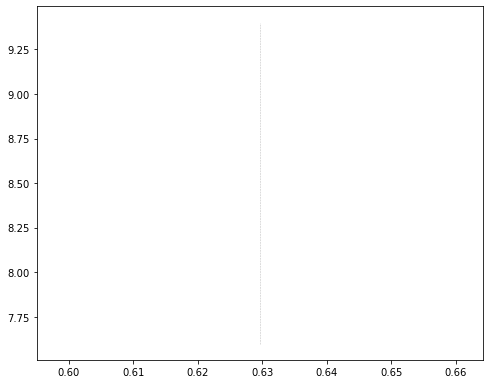

In [333]:
print(len(shap_values_combined))
if len(shap_values_combined) > 2:
    shap.plots.waterfall(shap_values_combined[2])
else:
    print("Index out of bounds.")

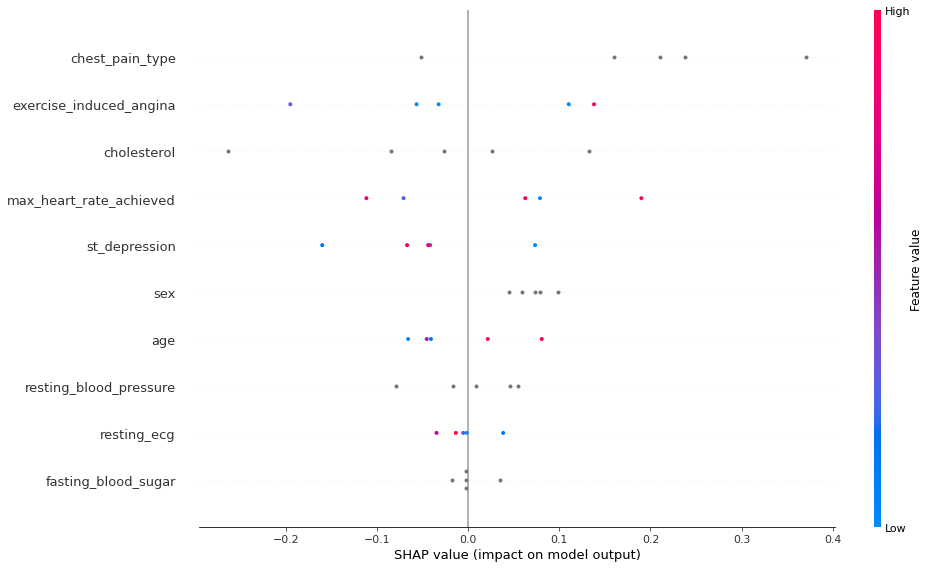

In [329]:
shap.summary_plot(shap_values_combined[0:5], X_test.iloc[0:5,:], 
                  feature_names=original_feature_names, plot_type = "dot", plot_size = (14,8),max_display = None)

In [318]:
X_test.iloc[0:5,:]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression
859,58,Male,non-anginal,150.0,219.0,NoDiabetes,st-t_abnormality,118.0,yes,0.0
10,57,Male,asymptomatic,140.0,192.0,NoDiabetes,normal,148.0,no,0.4
498,38,Male,asymptomatic,120.0,282.0,NoDiabetes,normal,170.0,no,0.0
509,48,Male,asymptomatic,106.0,263.0,diabetes,normal,110.0,no,0.0
870,41,Male,asymptomatic,150.0,171.0,NoDiabetes,normal,128.0,yes,1.5


In [327]:
original_feature_names

['age',
 'resting_blood_pressure',
 'cholesterol',
 'max_heart_rate_achieved',
 'st_depression',
 'sex',
 'chest_pain_type',
 'resting_ecg',
 'fasting_blood_sugar',
 'exercise_induced_angina']

In [326]:
feature_names

['age',
 'resting_blood_pressure',
 'cholesterol',
 'max_heart_rate_achieved',
 'st_depression',
 'sex_Female',
 'sex_Male',
 'chest_pain_type_asymptomatic',
 'chest_pain_type_atypical_angina',
 'chest_pain_type_non-anginal',
 'chest_pain_type_typical_angina',
 'resting_ecg_lv_hypertrophy',
 'resting_ecg_normal',
 'resting_ecg_st-t_abnormality',
 'fasting_blood_sugar_NoDiabetes',
 'fasting_blood_sugar_diabetes',
 'exercise_induced_angina_no',
 'exercise_induced_angina_yes']

# Next up - Upsampling the age and female gender and run the models again. This time also with cross_validate as the new standard

# Try to make different training and testing set based on difference in age

In [295]:
from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN

smote = SMOTE(k_neighbors = 5, random_state = 1)
adasyn = ADASYN(n_neighbors = 5, random_state = 1)

# Its not working very well with smote and adasyn, they are reducing some of the performance on default, try to optimize the parameters used.
#smote_param_grid = {
#    "k_neighbors": [3, 4, 5, 6, 7, 9],
#    "random_state": [1]
#}

#adasyn_param_grid = {
#    "n_neighbors": [3, 4, 5, 6, 7, 9],
#    "random_state": [1]
#}

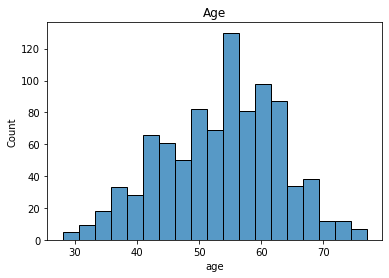

In [296]:
sns.histplot(x = "age", data=data).set(title="Age")
plt.show()

## Trained on people below 60 and tested on those above 60

In [297]:
# If I have the time I should redo this.
## Train on those above 60-65 and test on those below 40-45.
## Train on those below 40-45 and test on those above 60-65.

In [298]:
print("Train on people below 60 and test on those above 60")
train_maskAge1 = data_temp[(data_temp["age"] <= 60)]           
test_maskAge1 = data_temp[(data_temp["age"] > 60)]              

X_trainAge1 = train_maskAge1.drop(columns=["target"])
y_trainAge1 = train_maskAge1["target"].values
X_testAge1 = test_maskAge1.drop(columns=["target"])
y_testAge1 = test_maskAge1["target"].values

print(Counter(y_trainAge1))
print()

#Scaling of the data 
processedXtrainAge1 = pipeline.fit_transform(X_trainAge1) 
processedXtestAge1 = pipeline.transform(X_testAge1)

kNNAge1 = KNeighborsClassifier(13)
kNNAge1.fit(processedXtrainAge1, y_trainAge1)
y_predkNNAge1 = kNNAge1.predict(processedXtestAge1)

Train on people below 60 and test on those above 60
Counter({0: 351, 1: 348})



## Trained on people above 60 and tested on those below 60

In [299]:
print("Train on people above 60 and test on those below 60")
# Divide into the groups for train and test
train_maskAge2 = data_temp[(data_temp["age"] > 60)]           
test_maskAge2 = data_temp[(data_temp["age"] <= 60)]                 

X_trainAge2= train_maskAge2.drop(columns=["target"])
y_trainAge2= train_maskAge2["target"].values
X_testAge2= test_maskAge2.drop(columns=["target"])
y_testAge2= test_maskAge2["target"].values

# Scaling of the data 
processedXtrainAge2 = pipeline.fit_transform(X_trainAge2) 
processedXtestAge2 = pipeline.transform(X_testAge2)

# printing out the counts of the target before and after oversampling
print(Counter(y_trainAge2)) # There is imbalance in the training dataset, oversampling will be done using SMOTE
print()
processedXtrainAge2_smote, y_trainAge2_smote = smote.fit_resample(processedXtrainAge2, y_trainAge2) # Using SMOTE
processedXtrainAge2_adasyn, y_trainAge2_adasyn = adasyn.fit_resample(processedXtrainAge2, y_trainAge2) # Using ADASYN
print(Counter(y_trainAge2_smote))
print(Counter(y_trainAge2_adasyn))
print()

# creating two classifiers one for each oversampling technique 
kNNAge2_smote = KNeighborsClassifier(13)
kNNAge2_adasyn = KNeighborsClassifier(13)

# fit with the data 
kNNAge2_smote.fit(processedXtrainAge2_smote, y_trainAge2_smote)
kNNAge2_adasyn.fit(processedXtrainAge2_adasyn, y_trainAge2_adasyn)

# Make predictions
y_predkNNAge2_smote = kNNAge2_smote.predict(processedXtestAge2)
y_predkNNAge2_adasyn = kNNAge2_adasyn.predict(processedXtestAge2)

Train on people above 60 and test on those below 60
Counter({1: 161, 0: 60})

Counter({0: 161, 1: 161})
Counter({1: 161, 0: 160})



## Trained on people between 45 and 65 and tested on those below 45 and above 65

In [300]:
print("Train on people between 45 and 65 and test on those below 45 and above 65")
train_maskAge3= data_temp[(data_temp["age"] >= 45) & (data_temp["age"] <= 65)]    
test_maskAge3= data_temp[(data_temp["age"] < 45) | (data_temp["age"] > 65)]       

X_trainAge3= train_maskAge3.drop(columns=["target"])
y_trainAge3= train_maskAge3["target"].values
X_testAge3= test_maskAge3.drop(columns=["target"])
y_testAge3= test_maskAge3["target"].values

#Scaling of the data 
processedXtrainAge3 = pipeline.fit_transform(X_trainAge3) 
processedXtestAge3 = pipeline.transform(X_testAge3)

print(processedXtrainAge3.shape)
print(processedXtestAge3.shape)

# printing out the counts of the target before and after oversampling
print(Counter(y_trainAge3)) # There is imbalance in the training dataset, oversampling will be done using SMOTE
print()
processedXtrainAge3_smote, y_trainAge3_smote = smote.fit_resample(processedXtrainAge3, y_trainAge3) # Using SMOTE
processedXtrainAge3_adasyn, y_trainAge3_adasyn = adasyn.fit_resample(processedXtrainAge3, y_trainAge3) # Using ADASYN
print(Counter(y_trainAge3_smote))
print(Counter(y_trainAge3_adasyn))
print()

# creating two classifiers one for each oversampling technique 
kNNAge3_smote = KNeighborsClassifier(13)
kNNAge3_adasyn = KNeighborsClassifier(13)

# fit with the data 
kNNAge3_smote.fit(processedXtrainAge3_smote, y_trainAge3_smote)
kNNAge3_adasyn.fit(processedXtrainAge3_adasyn, y_trainAge3_adasyn)

# Make predictions
y_predkNNAge3_smote = kNNAge3_smote.predict(processedXtestAge3)
y_predkNNAge3_adasyn = kNNAge3_adasyn.predict(processedXtestAge3)

Train on people between 45 and 65 and test on those below 45 and above 65
(660, 18)
(260, 18)
Counter({1: 394, 0: 266})

Counter({0: 394, 1: 394})
Counter({0: 394, 1: 394})



In [301]:
## Predictions for oversampling with SMOTE

print("Trained on people below 60 and tested on those above 60")
classReport(y_testAge1, y_predkNNAge1)
print()
print("Trained on people above 60 and tested on those below 60")
classReport(y_testAge2, y_predkNNAge2_smote)
print()
print("Trained on people between 45 and 65 and tested on those below 45 and above 65")
classReport(y_testAge3,y_predkNNAge3_smote)

Trained on people below 60 and tested on those above 60
              precision    recall  f1-score   support

           0      0.718     0.467     0.566        60
           1      0.824     0.932     0.875       161

    accuracy                          0.805       221
   macro avg      0.771     0.699     0.720       221
weighted avg      0.795     0.805     0.791       221


Trained on people above 60 and tested on those below 60
              precision    recall  f1-score   support

           0      0.709     0.818     0.759       351
           1      0.782     0.661     0.717       348

    accuracy                          0.740       699
   macro avg      0.745     0.739     0.738       699
weighted avg      0.745     0.740     0.738       699


Trained on people between 45 and 65 and tested on those below 45 and above 65
              precision    recall  f1-score   support

           0      0.798     0.897     0.844       145
           1      0.845     0.713     0.774  

In [302]:
## Predictions for oversampling with ADASYN

print("Trained on people below 60 and tested on those above 60")
classReport(y_testAge1, y_predkNNAge1)
print()
print("Trained on people above 60 and tested on those below 60")
classReport(y_testAge2, y_predkNNAge2_adasyn)
print()
print("Trained on people between 45 and 65 and tested on those below 45 and above 65")
classReport(y_testAge3,y_predkNNAge3_adasyn)

Trained on people below 60 and tested on those above 60
              precision    recall  f1-score   support

           0      0.718     0.467     0.566        60
           1      0.824     0.932     0.875       161

    accuracy                          0.805       221
   macro avg      0.771     0.699     0.720       221
weighted avg      0.795     0.805     0.791       221


Trained on people above 60 and tested on those below 60
              precision    recall  f1-score   support

           0      0.715     0.781     0.747       351
           1      0.756     0.687     0.720       348

    accuracy                          0.734       699
   macro avg      0.736     0.734     0.733       699
weighted avg      0.736     0.734     0.733       699


Trained on people between 45 and 65 and tested on those below 45 and above 65
              precision    recall  f1-score   support

           0      0.777     0.890     0.830       145
           1      0.830     0.678     0.746  

In [303]:
#conf_matrix(y_testAge1, y_predkNNAge1, "Trained on people below 60 and tested on those above 60")
#conf_matrix(y_testAge2, y_predkNNAge2, "Trained on people above 45 and tested on those below 45 ")
#conf_matrix(y_testAge3,y_predkNNAge3, "Trained on people between 42 and 65 and tested on those below 42 and above 65")

# Try to make different training and testing set based on gender

In [622]:
data_test_gender = data_temp.copy()
import copy

## Different kind of test after fifth meeting. train on male/female and test on male/female, doing cross over. Without Oversampling

In [621]:
StackClf

StackingClassifier(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
                   estimators=[('knn', KNeighborsClassifier(n_neighbors=13)),
                               ('DecTree',
                                DecisionTreeClassifier(max_depth=8,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=30,
                                                       min_samples_leaf=6,
                                                       min_samples_split=4)),
                               ('RF',
                                RandomForestClassifier(max_depth=8,
                                                       max_leaf_nodes=20,
                                                       min_samples_leaf=4,
                                                       n_estimator...
                                              learning_rate=0.05, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=6,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=50, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None, ...))],
                   final_estimator=LogisticRegression(C=0.5, max_iter=50,
                                                      solver='liblinear'))

In [623]:
# Divide dataset into male and female.

# 1. Take out 25% of the male data for test. -> train/test/split, stratify
maleData1 = data_test_gender[(data_test_gender["sex"] == "Male")] # Only males included in this variable
Xmale1 = maleData1.drop(columns=["target"])
yMale1 = maleData1["target"].values
X_trainMale1, X_testMale1, y_trainMale1, y_testMale1 = train_test_split(Xmale1, yMale1, test_size=0.25, random_state=5, stratify=yMale1, shuffle= True)

# 2. Take out 25% of the female data for test. -> train/test/split, stratify
femaleData1 = data_test_gender[(data_test_gender["sex"] == "Female")] # Only females included in this variable
Xfemale1 = femaleData1.drop(columns=["target"])
yfemale1 = femaleData1["target"].values
X_trainFemale1, X_testFemale1, y_trainFemale1, y_testFemale1 = train_test_split(Xfemale1, yfemale1, test_size=0.25, random_state=5, stratify=yfemale1, shuffle= True)

# 3. Scaling of the data
processedXtrainMale1 = pipeline.fit_transform(X_trainMale1) 
processedXtestMale1 = pipeline.transform(X_testMale1)

processedXtrainFemale1 = pipeline.fit_transform(X_trainFemale1) 
processedXtestFemale1 = pipeline.transform(X_testFemale1)


In [624]:
# 4. Train model on males only. Test on the 25% male testset and 25% female testset.
# Model used will be the StackingClassifier 
StackClfMale = copy.deepcopy(StackClf)

# Train model on male samples
StackClfMale.fit(processedXtrainMale1, y_trainMale1)

### It dosent work with cross_validate on the female test set, I think this might be because of the low number of samples. There are only 48 and 12 of them will be class 1. Try with normal predict.
## Get results from testing on males
#resultsMaleVsMale = cross_validate(StackClfMale, processedXtestMale1, y_testMale1, cv=skf5, scoring=scoring, return_train_score=True)
#y_predStackingMaleVsMale = cross_val_predict(StackClfMale, processedXtestMale1, y_testMale1, cv=skf5)

## Show results for male vs male
#print("Test/Validation Set Performance Metrics - Male vs Male:")
#print(f"F1-score (WA): {resultsMaleVsMale['test_f1_weighted'].mean()*100:.2f}%")
#print(f"Sensitivity: {resultsMaleVsMale['test_sensitivity'].mean()*100:.2f}%")
#print(f"Specificity: {resultsMaleVsMale['test_specificity'].mean()*100:.2f}%")
#print(f"Accuracy: {resultsMaleVsMale['test_accuracy'].mean()*100:.2f}%")

## Get results from testing on females
#resultsMaleVsFemale = cross_validate(StackClfMale, processedXtestFemale1, y_testFemale1, cv=3, scoring=scoring, return_train_score=True)
#y_predStackingMaleVsFemale = cross_val_predict(StackClfMale, processedXtestFemale1, y_testFemale1, cv=3)

## Show results for male vs female
#print("Test/Validation Set Performance Metrics - Male vs Female:")
#print(f"F1-score (WA): {resultsMaleVsFemale['test_f1_weighted'].mean()*100:.2f}%")
#print(f"Sensitivity: {resultsMaleVsFemale['test_sensitivity'].mean()*100:.2f}%")
#print(f"Specificity: {resultsMaleVsFemale['test_specificity'].mean()*100:.2f}%")
#print(f"Accuracy: {resultsMaleVsFemale['test_accuracy'].mean()*100:.2f}%")



# Make predictions
y_predStackingMaleVsMale = StackClfMale.predict(processedXtestMale1)
y_predStackingMaleVsFemale = StackClfMale.predict(processedXtestFemale1)

# If i use the cross_validate function, I will get errors when doing cv=3 on the female testset and also getting 0% for sensitivity and 100% for specificity.

# 5. Train model on females only. Test on the 25% females test set and 25% male test set.
StackClfFemale = copy.deepcopy(StackClf)

# Train model on female samples
StackClfFemale.fit(processedXtrainFemale1, y_trainFemale1)

# Make predictions
y_predStackingFemaleVsFemale = StackClfFemale.predict(processedXtestFemale1)
y_predStackingMFemaleVsMale = StackClfFemale.predict(processedXtestMale1)

In [625]:
### Classification Report
print("Trained on males and tested on males")
classReport(y_testMale1, y_predStackingMaleVsMale)
print("Trained on males and tested on females")
classReport(y_testFemale1, y_predStackingMaleVsFemale)

print("Trained on females and tested on females")
classReport(y_testFemale1, y_predStackingFemaleVsFemale)
print("Trained on females and tested on males")
classReport(y_testMale1, y_predStackingMFemaleVsMale)

Trained on males and tested on males
              precision    recall  f1-score   support

           0     0.8333    0.5970    0.6957        67
           1     0.7985    0.9304    0.8594       115

    accuracy                         0.8077       182
   macro avg     0.8159    0.7637    0.7775       182
weighted avg     0.8113    0.8077    0.7991       182

Trained on males and tested on females
              precision    recall  f1-score   support

           0     0.9130    0.5833    0.7119        36
           1     0.4231    0.8462    0.5641        13

    accuracy                         0.6531        49
   macro avg     0.6681    0.7147    0.6380        49
weighted avg     0.7831    0.6531    0.6727        49

Trained on females and tested on females
              precision    recall  f1-score   support

           0     0.7556    0.9444    0.8395        36
           1     0.5000    0.1538    0.2353        13

    accuracy                         0.7347        49
   macro av

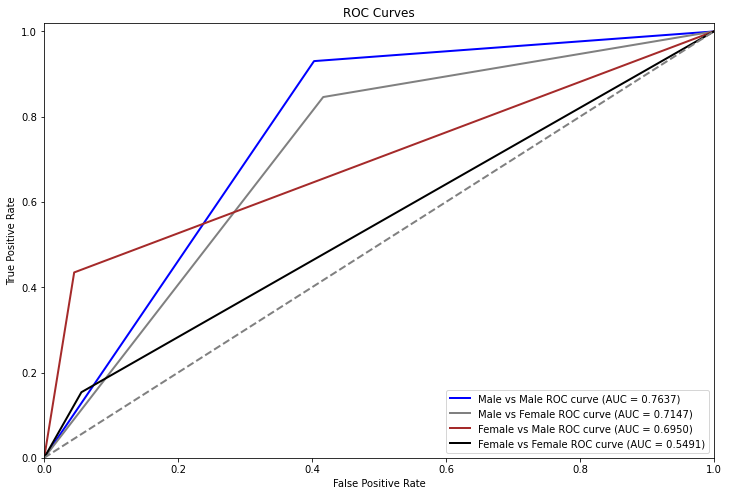

In [630]:
### ROC AUC 

# calculate false positive rate (fpr), true positive rate (tpr), and thresholds. It will return three arrays
fprMaleVsMale, tprMaleVsMale, thresholdsMaleVsMale = roc_curve(y_testMale1, y_predStackingMaleVsMale)
fprMaleVsFemale, tprMaleVsFemale, thresholdsMaleVsFemale = roc_curve(y_testFemale1, y_predStackingMaleVsFemale)
fprFemaleVsFemale, tprFemaleVsFemale, thresholdsFemaleVsFemale = roc_curve(y_testFemale1, y_predStackingFemaleVsFemale)
fprMFemaleVsMale , tprMFemaleVsMale , thresholdsMFemaleVsMale  = roc_curve(y_testMale1, y_predStackingMFemaleVsMale)


# calculate the area under the curve (AUC)
roc_aucMaleVsMale = auc(fprMaleVsMale, tprMaleVsMale)
roc_aucMaleVsFemale = auc(fprMaleVsFemale, tprMaleVsFemale)
roc_aucFemaleVsFemale = auc(fprFemaleVsFemale, tprFemaleVsFemale)
roc_aucMFemaleVsMale = auc(fprMFemaleVsMale, tprMFemaleVsMale)

# calculate standard deviation
MaleVsMale_std     = np.std(y_predStackingMaleVsMale)
MaleVsFemale_std   = np.std(y_predStackingMaleVsFemale)
FemaleVsFemale_std = np.std(y_predStackingFemaleVsFemale)
FemaleVsMale_std   = np.std(y_predStackingMFemaleVsMale)

# plot ROC curve
plt.figure(figsize=(12,8))

plt.plot(fprMaleVsMale, tprMaleVsMale, color="blue", lw=2, label="Male vs Male ROC curve (AUC = %0.4f)" % roc_aucMaleVsMale)
plt.plot(fprMaleVsFemale, tprMaleVsFemale, color="grey", lw=2, label="Male vs Female ROC curve (AUC = %0.4f)" % roc_aucMaleVsFemale)
plt.plot(fprMFemaleVsMale, tprMFemaleVsMale, color="brown", lw=2, label="Female vs Male ROC curve (AUC = %0.4f)" % roc_aucMFemaleVsMale)
plt.plot(fprFemaleVsFemale, tprFemaleVsFemale, color="black", lw=2, label="Female vs Female ROC curve (AUC = %0.4f)" % roc_aucFemaleVsFemale)

plt.plot([0, 1], [0, 1], color="grey", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.02])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="lower right")
plt.show()

## Try oversampling with SMOTE

In [627]:
# printing out the counts of the target before and after oversampling
print(Counter(y_trainMale1)) # There is imbalance in the training dataset.
print(Counter(y_trainFemale1))
print()
processedXtrainMale1_smote, y_trainMale1_smote = smote.fit_resample(processedXtrainMale1, y_trainMale1) # Using SMOTE
processedXtrainFemale1_smote, y_trainFemale1_smote = smote.fit_resample(processedXtrainFemale1, y_trainFemale1) # Using SMOTE
print(Counter(y_trainMale1_smote))
print(Counter(y_trainFemale1_smote))
print()

# Create classifiers for the oversampling
StackClfMale_smote   = copy.deepcopy(StackClf)
StackClfFemale_smote = copy.deepcopy(StackClf)


# Train model on female samples
StackClfMale_smote.fit(processedXtrainMale1_smote, y_trainMale1_smote)
StackClfFemale_smote.fit(processedXtrainFemale1_smote, y_trainFemale1_smote)


# Make predictions
y_predStackingMaleVsMale_smote = StackClfMale_smote.predict(processedXtestMale1)
y_predStackingMaleVsFemale_smote = StackClfMale_smote.predict(processedXtestFemale1)

y_predStackingFemaleVsFemale_smote = StackClfFemale_smote.predict(processedXtestFemale1)
y_predStackingMFemaleVsMale_smote = StackClfFemale_smote.predict(processedXtestMale1)


Counter({1: 344, 0: 200})
Counter({0: 108, 1: 37})

Counter({0: 344, 1: 344})
Counter({0: 108, 1: 108})



In [628]:
print("Trained on males and tested on males, with oversampling")
classReport(y_testMale1, y_predStackingMaleVsMale_smote)
print("Trained on males and tested on females, with oversampling")
classReport(y_testFemale1, y_predStackingMaleVsFemale_smote)

print("Trained on females and tested on females, with oversampling")
classReport(y_testFemale1, y_predStackingFemaleVsFemale_smote)
print("Trained on females and tested on males, with oversampling")
classReport(y_testMale1, y_predStackingMFemaleVsMale_smote)

Trained on males and tested on males, with oversampling
              precision    recall  f1-score   support

           0     0.7273    0.7164    0.7218        67
           1     0.8362    0.8435    0.8398       115

    accuracy                         0.7967       182
   macro avg     0.7817    0.7799    0.7808       182
weighted avg     0.7961    0.7967    0.7964       182

Trained on males and tested on females, with oversampling
              precision    recall  f1-score   support

           0     0.9032    0.7778    0.8358        36
           1     0.5556    0.7692    0.6452        13

    accuracy                         0.7755        49
   macro avg     0.7294    0.7735    0.7405        49
weighted avg     0.8110    0.7755    0.7852        49

Trained on females and tested on females, with oversampling
              precision    recall  f1-score   support

           0     0.8000    0.8889    0.8421        36
           1     0.5556    0.3846    0.4545        13

    accu

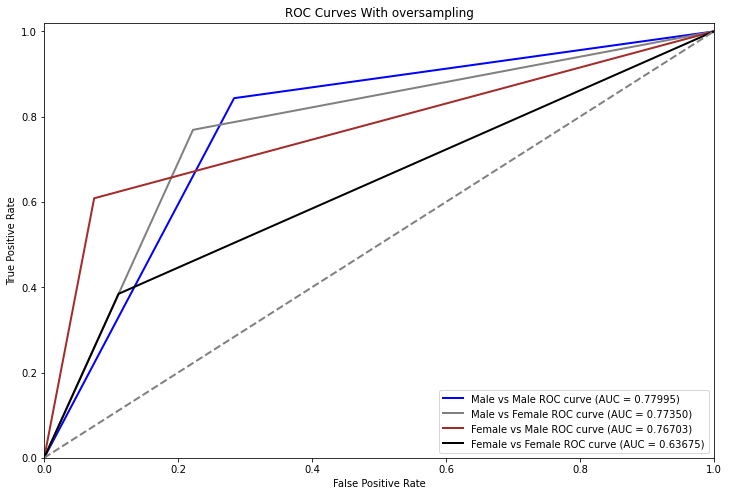

In [631]:
# calculate false positive rate (fpr), true positive rate (tpr), and thresholds. It will return three arrays
fprMaleVsMale_smote, tprMaleVsMale_smote, thresholdsMaleVsMale_smote = roc_curve(y_testMale1, y_predStackingMaleVsMale_smote)
fprMaleVsFemale_smote, tprMaleVsFemale_smote, thresholdsMaleVsFemale_smote = roc_curve(y_testFemale1, y_predStackingMaleVsFemale_smote)
fprFemaleVsFemale_smote, tprFemaleVsFemale_smote, thresholdsFemaleVsFemale_smote = roc_curve(y_testFemale1, y_predStackingFemaleVsFemale_smote)
fprMFemaleVsMale_smote , tprMFemaleVsMale_smote , thresholdsMFemaleVsMale_smote  = roc_curve(y_testMale1, y_predStackingMFemaleVsMale_smote)


# calculate the area under the curve (AUC)
roc_aucMaleVsMale_smote = auc(fprMaleVsMale_smote, tprMaleVsMale_smote)
roc_aucMaleVsFemale_smote = auc(fprMaleVsFemale_smote, tprMaleVsFemale_smote)
roc_aucFemaleVsFemale_smote = auc(fprFemaleVsFemale_smote, tprFemaleVsFemale_smote)
roc_aucMFemaleVsMale_smote = auc(fprMFemaleVsMale_smote, tprMFemaleVsMale_smote)

# calculate standard deviation
MaleVsMale_smote_std     = np.std(y_predStackingMaleVsMale_smote)
MaleVsFemale_smote_std   = np.std(y_predStackingMaleVsFemale_smote)
FemaleVsFemale_smote_std = np.std(y_predStackingFemaleVsFemale_smote)
FemaleVsMale_smote_std   = np.std(y_predStackingMFemaleVsMale_smote)



# plot ROC curve
plt.figure(figsize=(12,8))

plt.plot(fprMaleVsMale_smote, tprMaleVsMale_smote, color="blue", lw=2, label="Male vs Male ROC curve (AUC = %0.5f)" % roc_aucMaleVsMale_smote)
plt.plot(fprMaleVsFemale_smote, tprMaleVsFemale_smote, color="grey", lw=2, label="Male vs Female ROC curve (AUC = %0.5f)" % roc_aucMaleVsFemale_smote)
plt.plot(fprMFemaleVsMale_smote, tprMFemaleVsMale_smote, color="brown", lw=2, label="Female vs Male ROC curve (AUC = %0.5f)" % roc_aucMFemaleVsMale_smote)
plt.plot(fprFemaleVsFemale_smote, tprFemaleVsFemale_smote, color="black", lw=2, label="Female vs Female ROC curve (AUC = %0.5f)" % roc_aucFemaleVsFemale_smote)

plt.plot([0, 1], [0, 1], color="grey", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.02])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves With oversampling")
plt.legend(loc="lower right")
plt.show()

# Nothing to see here